# <font color='orange'> Numerical Exercises 8 </font>

In this numerical laboratory we apply Monte Carlo methods to simulate a $ 1D $ quantum model described by the hamiltonian

$$ \hat{H}(\hat{x}, \hat{p}) = \frac{\hat{p}^2}{2m} + \hat{V}(\hat{x}) $$
$$ \hat{V}(\hat{x}) = \hat{x}^4 - \frac{5}{2}\hat{x}^2 $$

which described a confined quantum particle and which is not analytically solvable.
In particular we want to variationally optimize the ground state of this particle using the following trial wave function:

$$ 
    \Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}} + 
    e^{-\frac{(x+\mu)^2}{2\sigma^2}} 
$$

which depends on two variational parameters $ \sigma $ and $ \mu $.<br>
It is convenient to use the units $ \hbar = m = 1 $ to solve the exercises below. 

## <font color='blue'> Exercise 08.1 </font>

The first step is to use the Metropolis algorithm to compute the variational energy

$$ 
    \langle \hat{H} \rangle_T = 
    \frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}{\int dx |\Psi_T(x)|^2} = 
    \int dx \underbrace{\frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2}}_{p_{T}(x)}
    \underbrace{\frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}}_{f(x)} \geq E_{GS}
$$

Accordingly, I sample the trial probability distribution density $ p_T(x) $ using $ M = 10^4 $ Monte Carlo steps and a moving parameter for the Markov chain calibrated in accordance with the $ 50\% $ empirical rule $\delta = 2.7$. <br>
I choose as the starting point of the stochastic chain the point $ x_{start} = 0 $ by looking at the shape of the $|\Psi_T(x)|^2$ obtained with a *Numerical Diagonalization (ND)* technique presented in the <font color='olive'> Exercise Sheet</font>: in this point in fact the probability density to be sampled is sufficiently large and this usually allows a faster convergence.
Once carried out the sampling I compute the *variational energy* by evaluating the integrand $ f(x) $ on the points thus obtained and I study its statistical properties with the usual blocking method, using $ N_{blk} = 100 $ blocks. <br>
First of all I simulate the $ 1D $ **Quantum Harmonic Oscillator (HO)** in order to verify the correctness of my code. Therefore I confine the particle with the harmonic potential 

$$ \hat{V}_{HO}(x) = \frac{1}{2} \hat{x}^2 $$

which is analytically solvable, and set the variational parameters to the values of the exact solution of the Schrodinger equation $ \sigma_{HO} = 1 $ and $ \mu_{HO} = 0 $. <br>
I show the ground state (GS) "variational" energy and the sampled probability distribution for this *check simulation*.

In [1]:
#Modules
from math import sqrt, pi, exp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()"> Show/Hide code cells </a>.''')

In [2]:
#In the case of single graphs in the figure
#I set the central alignment
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
'''

  Numerical solution obtained by transforming 
  the Schrodinger equation into a matrix equation
  
  OSS:
  The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2
  
  np.diag(np.array,k) construct a "diagonal" matrix using the np.array
  The default is k=0. Use k>0 for diagonals above the main diagonal, 
  and k<0 for diagonals below the main diagonal

'''

def Vpot_HO(x):
    return 0.5*x**2

def Vpot(x):
    return (x**2 - 2.5)*x**2

hbar = 1
m = 1
a = 10
N = 1000 #number of iterations
scale = 0.3

#Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] #the step size
V_HO = Vpot_HO(x)
V = Vpot(x)

#Solution
CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
H_HO = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V_HO)  #Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)  #Hamiltonian matrix
E_HO,psi_HO = np.linalg.eigh(H_HO)  #Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)  #Compute eigenvectors and their eigenvalues
psi_HO = np.transpose(psi_HO)  #Take the transpose & normalize
psi_HO = psi_HO/np.sqrt(dx)
psi = np.transpose(psi)  #Take the transpose & normalize
psi = psi/np.sqrt(dx)

In [4]:
#load the data
N = np.loadtxt("08.1/energy_HO.dat", usecols=0,  unpack=True)
ene_HO, ene_HO_err=np.loadtxt("08.1/energy_HO.dat", usecols=(1, 2), unpack=True)
pdf_HO=np.loadtxt("08.1/pdf_HO.dat")

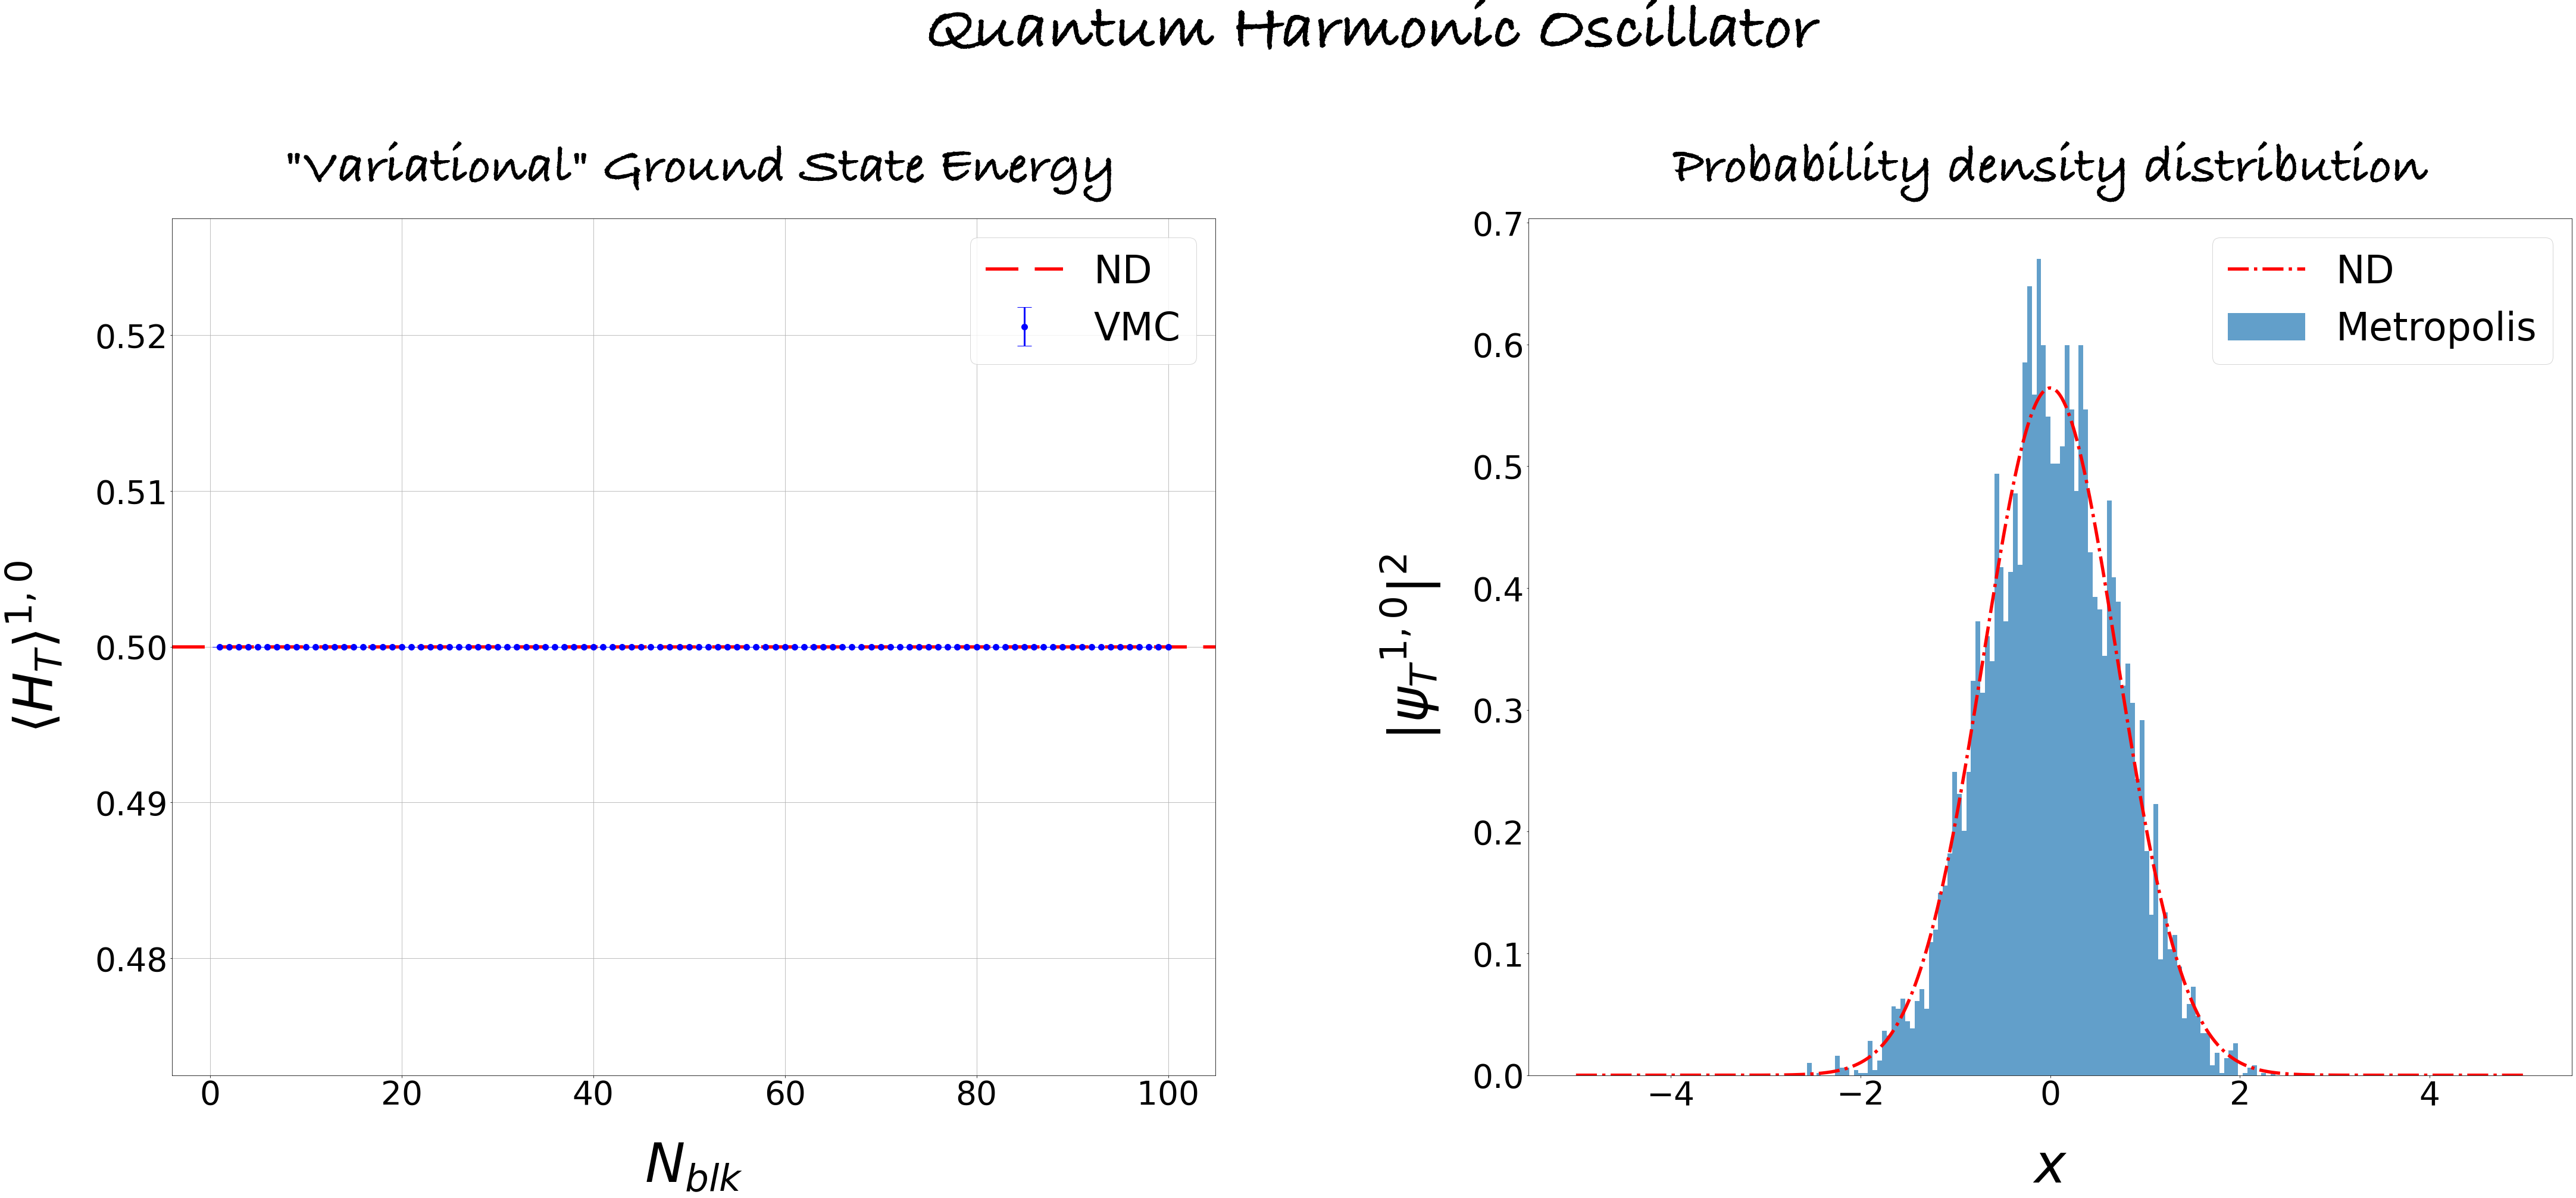

In [5]:
#plots
plt.figure(figsize=[70, 25])  #deafult (6.4,4.8)
plt.suptitle('Quantum Harmonic Oscillator', y=1.1, fontname = 'Bradley Hand', fontsize=110)

plt.subplot(1, 2, 1)
plt.title(' \"Variational\" Ground State Energy', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$N_{blk}$', fontsize=90, labelpad=50)
plt.ylabel('${\langle H_{T} \\rangle}^{1, 0}$', fontsize=90, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.errorbar(N, ene_HO, yerr=ene_HO_err, fmt='ob', elinewidth=3.0,
             markersize=10, capsize=12, label='VMC')
plt.axhline(y=E_HO[0], color='red', linewidth=5.5, linestyle='--', dashes=(10, 5), label='ND')
plt.grid(True)
plt.legend(fontsize=65, loc='best')

plt.subplot(1, 2, 2)
plt.title('Probability density distribution', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$x$', fontsize=90, labelpad=50)
plt.ylabel('${\\vert{\psi_T}^{1, 0}\\vert}^2$', fontsize=90, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.hist(pdf_HO, bins=100, density=True, alpha=0.7, label='Metropolis')
plt.plot(x,(psi_HO[0])**2, color='red', linewidth=5.5, linestyle='dashdot', label='ND')
plt.legend(fontsize=65, loc='best')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
plt.show()

As it is obvious to expect, the simulation produces the exact values for the GS energy in each block and reproduces trivially the correct wave function of the fundamental state, having taken as $ \psi_T(x) $ the exact ground state wave function of the HO.

Now I switch to the potential of our interest and perform a simulation with fixed random variational parameters $\sigma = 1.5$ and $\mu = 0.5$.<br>
I show my results as before.

In [6]:
#load the data
ene, ene_err=np.loadtxt("08.1/energy.dat", usecols=(1, 2), unpack=True)
pdf=np.loadtxt("08.1/pdf.dat")

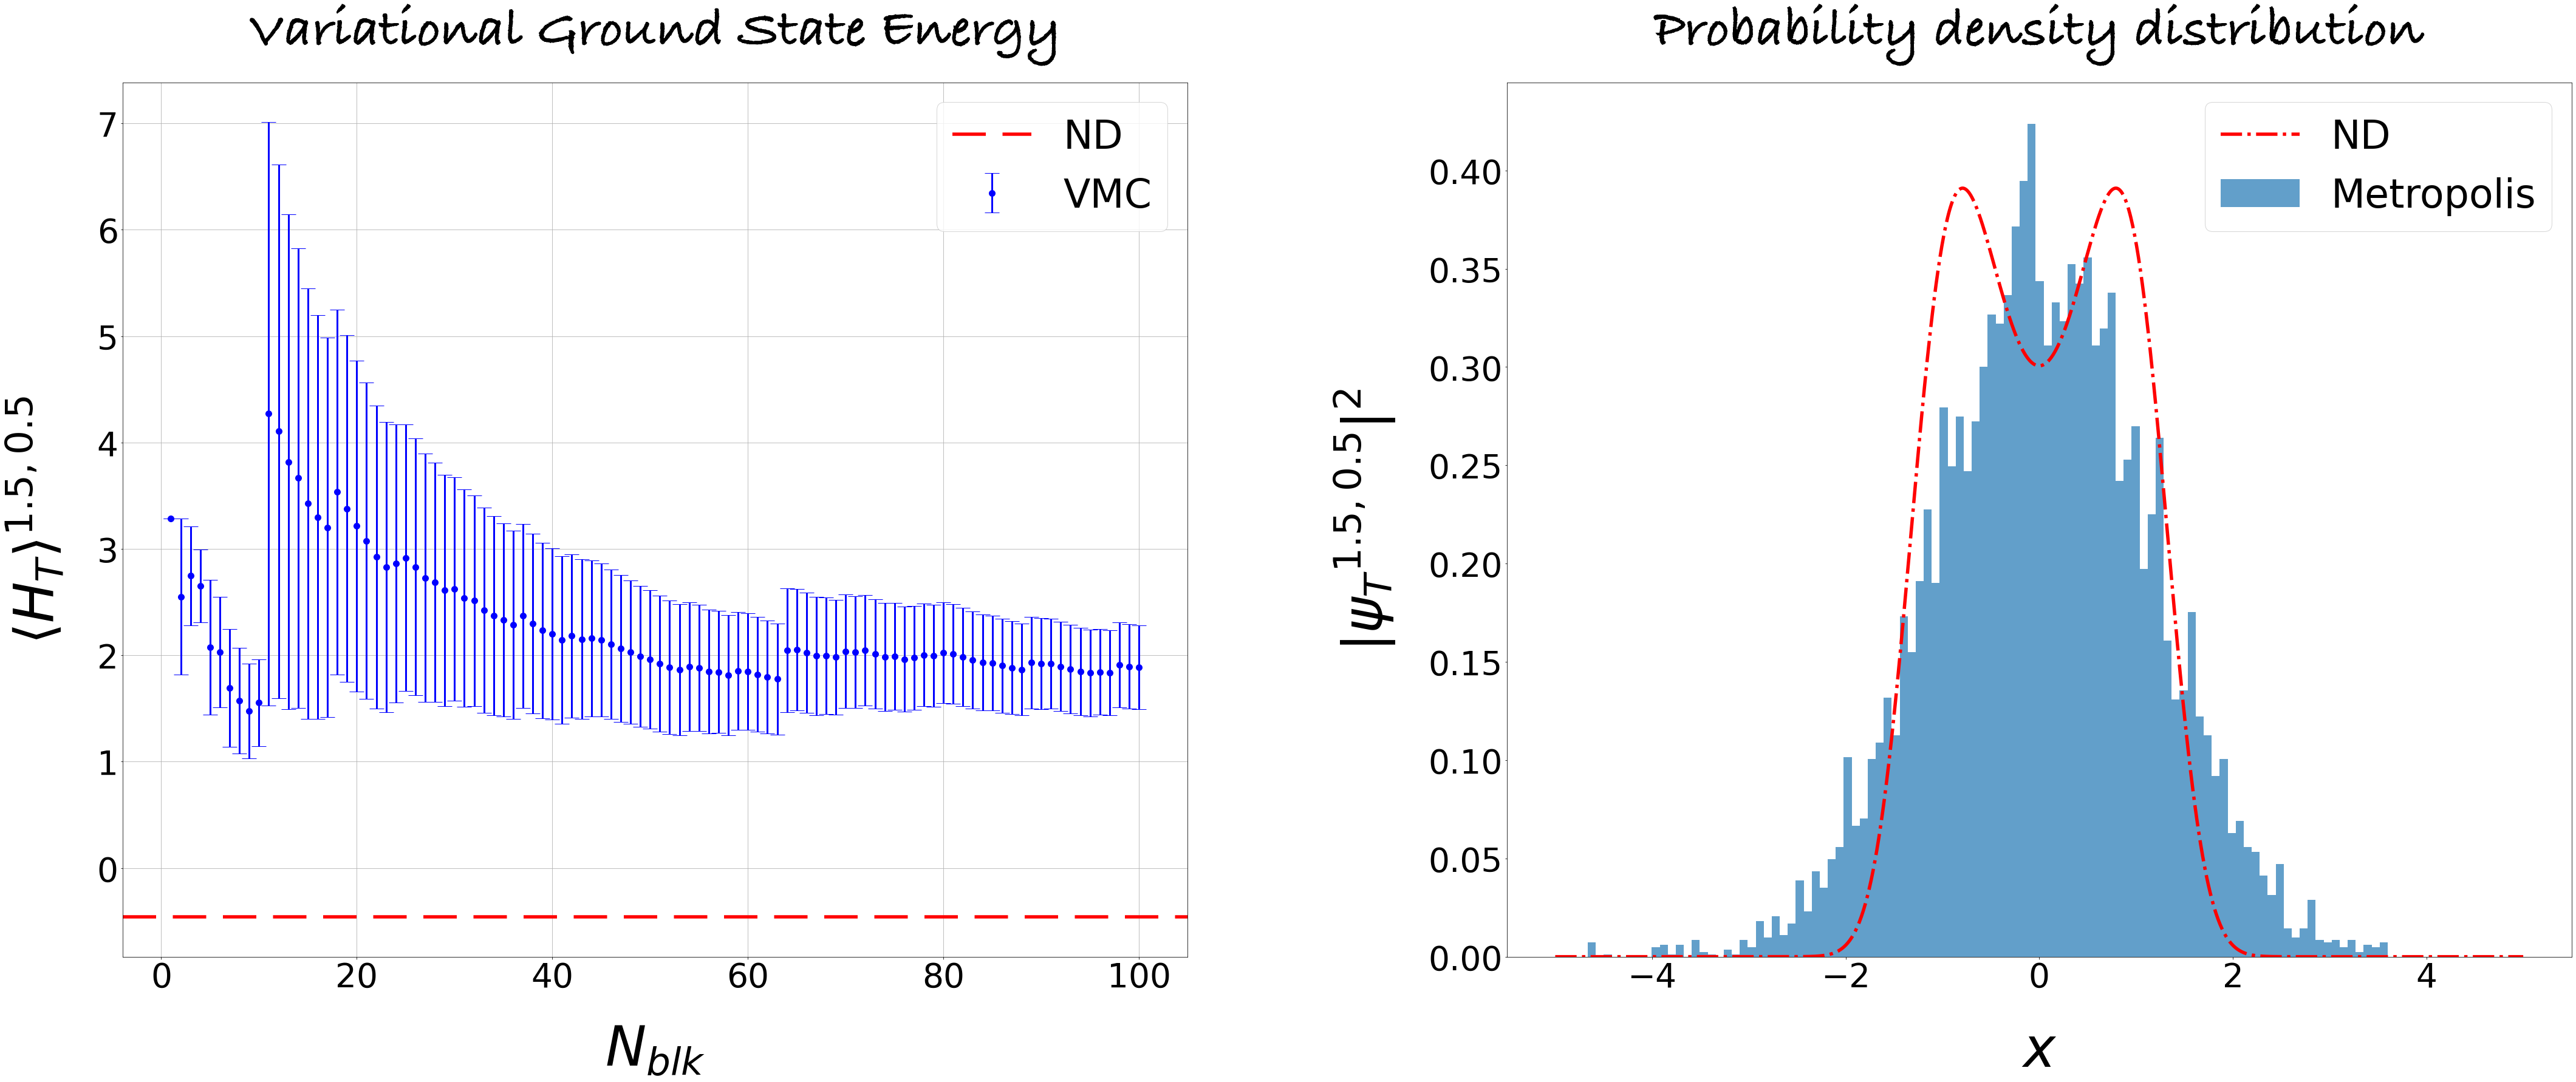

In [7]:
#plots
plt.figure(figsize=[70, 25])  #deafult (6.4,4.8)

plt.subplot(1, 2, 1)
plt.title('Variational Ground State Energy', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$N_{blk}$', fontsize=90, labelpad=50)
plt.ylabel('${\langle H_{T} \\rangle}^{1.5, 0.5}$', fontsize=90, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.errorbar(N, ene, yerr=ene_err, fmt='ob', elinewidth=3.0,
             markersize=10, capsize=12, label='VMC')
plt.axhline(y=E[0], color='red', linewidth=5.5, linestyle='--', dashes=(10, 5), label='ND')
plt.grid(True)
plt.legend(fontsize=65, loc='best')

plt.subplot(1, 2, 2)
plt.title('Probability density distribution', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$x$', fontsize=90, labelpad=50)
plt.ylabel('${\\vert {\psi_T}^{1.5, 0.5} \\vert}^2$', fontsize=90, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.hist(pdf, bins=100, density=True, alpha=0.7, label='Metropolis')
plt.plot(x,(psi[0])**2, color='red', linewidth=5.5, linestyle='dashdot', label='ND')
plt.legend(fontsize=65, loc='best')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
plt.show()

Obviously the results I obtained are not compatible with those expected by the Numerical Diagonalization of the  Schrodinger equation both for the ground state energy and for the probability density, having chosen the variational parameters $ \sigma $ and $ \mu $ randomly. <br>
However, I note that the  variational ground state energy turns out to be larger than the expected value (<font color='red'>red dotted line</font>), and this is in agreement with the *Variational Principle* that I’m using.

## <font color='blue'> Exercise 08.2 </font>

After the previous exercise, I proceed to minimize the variational energy to better estimate the ground state energy of the quantum particle. <br>
First of all, I create $ 10^2 \times 10^2 $ pairs $ ( \sigma, \mu ) $, taking $ 10^2 $ values of $ \mu $ evenly spaced in $ [0, 2] $ and $ 10^2 $ values of $ \sigma $ evenly spaced in $ [0.1, 2 ] $; this choice for the variational parameters comes again from the shape of the wave function of the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (<font color='red'>red dashdot line</font> in the graphs below).<br>
Once created this *parameters grid* I use the code written in the <font color='blue'> Exercise 08.1 </font> to evaluate $ \langle {\hat H}^{\sigma, \mu} \rangle_T = \dfrac{ \langle \Psi_T^{\sigma,\mu}| {\hat H} | \Psi_T^{\sigma,\mu} \rangle}{\langle \Psi_T^{\sigma,\mu} | \Psi_T^{\sigma,\mu} \rangle} $ for each pair $ ( \sigma, \mu) $: in this case I don't use the blocking method to estimate $ \langle {\hat H}^{\sigma, \mu} \rangle_T $, but I simply consider the average of the $ M = 10^4 $ Monte Carlo energy estimates made in the single run. Having estimated all energies, I search among these the smallest and save the parameters corresponding to it as the optimal ones. <br>
Finally I perform a last simulation (always repeating the steps of the previous exercise) in order to compute the variational ground state energy with the relative statistical uncertainty by fixing $\sigma$ and $\mu$ to the optimized values and using the usual blocking method, setting $ \delta = 2.7 $.
I show the results for the ground state energy and the probability density function obtained via the Variational Principle below.

<div class="alert alert-block alert-info">
 
  <b>Note</b> <br>
  Obviously the method in which I use a simple grid of parameters in the two-dimensional space is neither the 
  most efficient, nor even less the smartest; for example, when calculating the energies on the various points 
  of this grid I have no control over the $ \delta $ parameter of the Metropolis algorithm, and this fact can 
  inevitably lead to slower convergence at the correct probability density. However, given the relative 
  simplicity of the problem, at the moment it is a good solution able to minimize, as is shown below, the 
  variational energy of the system.
    
</div>

In [8]:
#load the data
sigma, mu = np.loadtxt("08.2/ground_state.dat", usecols=(0, 1), unpack=True, max_rows=1) #Optimized Parameters
N, ene, ene_err=np.loadtxt("08.2/ground_state.dat", usecols=(0, 1, 2), unpack=True, skiprows=1)
pdf=np.loadtxt("08.2/pdf.dat")

#Analytic pdf
x_analytic = np.linspace(-5, 5, 1000)
norm = (2*sqrt(pi)*sigma)*(1 + exp(-(mu**2)/(sigma**2)))
pdf_analytic = (1/norm)*(np.exp(-(x_analytic-mu)**2/(2*sigma**2))+np.exp(-(x_analytic+mu)**2/(2*sigma**2)))**2

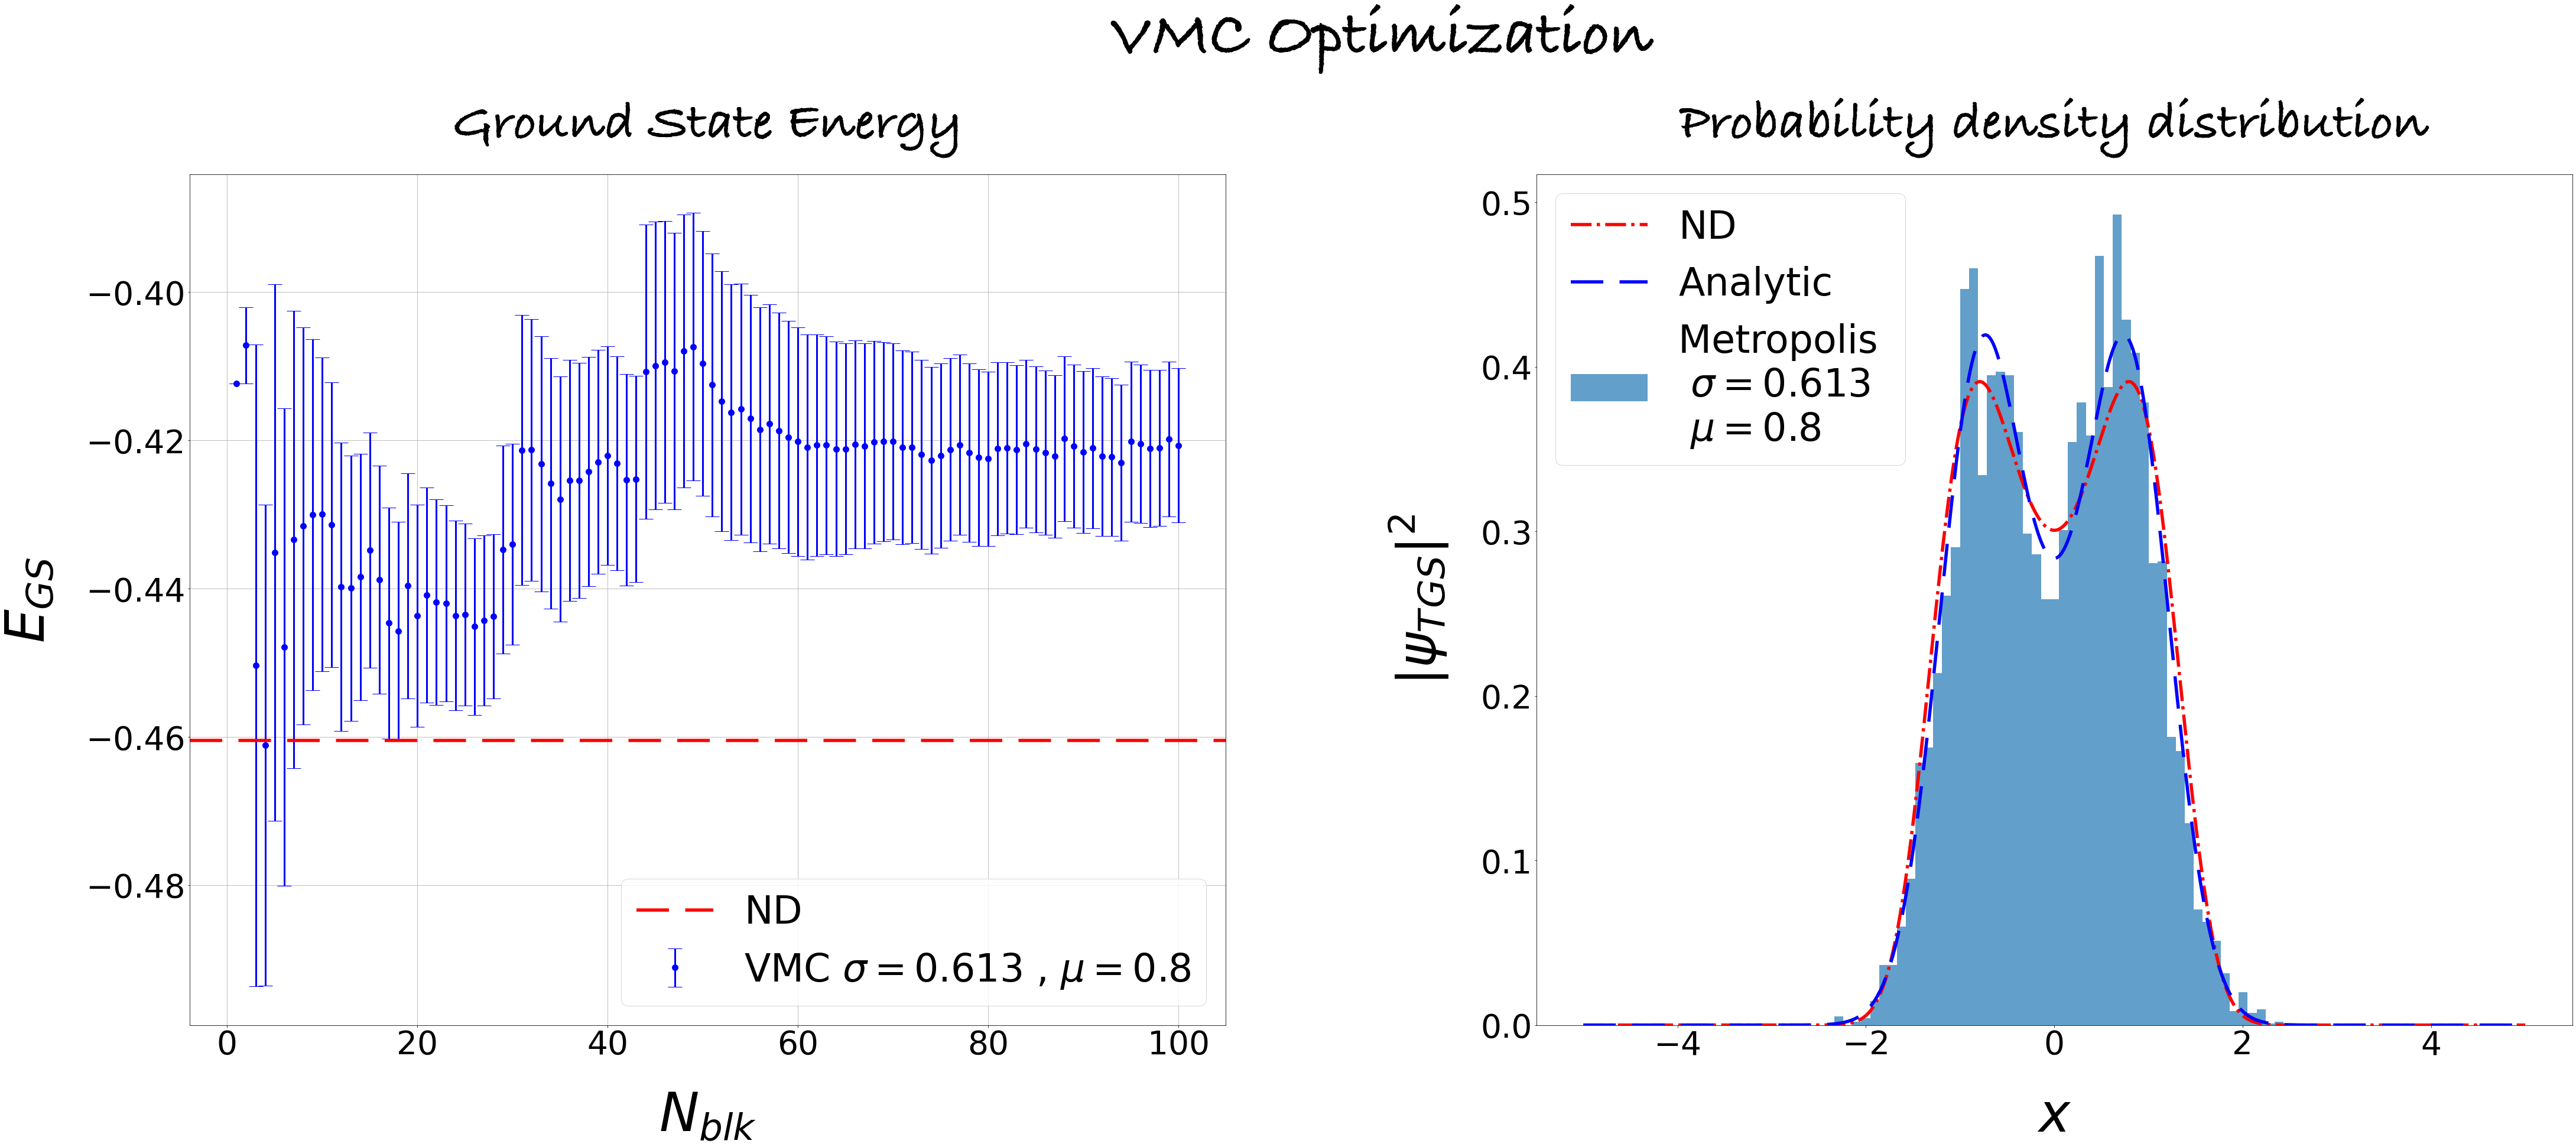

In [9]:
#plots
plt.figure(figsize=[70, 25])  #deafult (6.4,4.8)
plt.suptitle('VMC Optimization', y=1.06, fontname = 'Bradley Hand', fontsize=110)

plt.subplot(1, 2, 1)
plt.title('Ground State Energy', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$N_{blk}$', fontsize=90, labelpad=50)
plt.ylabel('$E_{GS}$', fontsize=90, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.errorbar(N, ene, yerr=ene_err, fmt='ob', elinewidth=3.0,
             markersize=10, capsize=12, label='VMC $\sigma=$' + str(sigma) + ' , $\mu=$' + str(mu))
plt.axhline(y=E[0], color='red', linewidth=5.5, linestyle='--', dashes=(10, 5), label='ND')
plt.grid(True)
plt.legend(fontsize=65, loc='best')

plt.subplot(1, 2, 2)
plt.title('Probability density distribution', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$x$', fontsize=90, labelpad=50)
plt.ylabel('${\\vert {\psi_T}_{GS} \\vert}^2$', fontsize=90, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.hist(pdf, bins=50, density=True, alpha=0.7,
         label='Metropolis \n $\sigma=$' + str(sigma) + '\n $\mu=$' + str(mu))
plt.plot(x,(psi[0])**2, color='red', linewidth=5.5, linestyle='dashdot', label='ND')
plt.plot(x_analytic, (pdf_analytic), color='blue', linewidth=5.5, 
         linestyle='--', dashes=(10, 5), label='Analytic')
plt.legend(fontsize=65, loc='upper left')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
plt.show()

My algorithm is therefore able to estimate the ground state energy of the particle within about two sigma from the expected value, and the optimal values that I find for the variational parameters are

$$ \sigma_{opt} =  0.613 \\ \mu_{opt} = 0.8 $$

which are reasonable values when compared with the exact wave function obtained by Numerical Diagonalisation.
Even the shape of the two peaks that characterizes the square modulus of the latter is reconstructed during the minimization, and is also comparable with the analytical curve (<font color='blue'>blue dashed line</font>) of the variational guess that is proposed at the beginning of the exercise.

Finally I show the curve $ \langle H(\sigma, \mu) \rangle_T  $ in the parameters space in such a way as to exhibit the obvious minimum that is taken by the variational Monte Carlo energy near the optimal parameters that I found.

In [10]:
#load the  data
s, m, var_ene=np.loadtxt("08.2/var_ene.dat", usecols=(0, 1, 2), skiprows=2, unpack=True)

X, Y = np.meshgrid(s, m)
Z = np.tile(var_ene, (len(var_ene), 1))

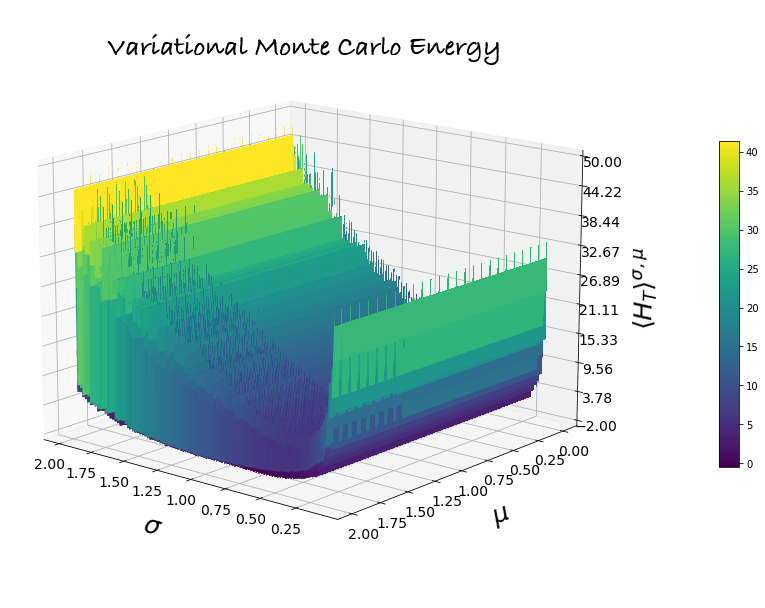

In [11]:
#plots
fig = plt.figure(figsize=[15, 12]) #deafult (6.4,4.8)
ax = plt.subplot(1, 1, 1, projection ="3d")
ax.set_title('Variational Monte Carlo Energy', ha='center', y=0.99, fontname = 'Bradley Hand', fontsize=28)
surface = ax.plot_surface(X, Y, Z, cmap='viridis', cstride=4, rstride=4, lw=0.0, antialiased=True)
ax.set_xlabel('$\sigma$', fontsize=25, labelpad=18)
ax.set_ylabel('$\mu$', fontsize=25, labelpad=18)
ax.set_zlabel('$ {\langle H_{T} \\rangle}^{\sigma, \mu}$', fontsize=25, labelpad=18)

# Customize the z axis
ax.set_zlim(-2, 50)
ax.zaxis.set_major_locator(LinearLocator(10))

# Add a color bar which maps values to colors.
fig.colorbar(surface, shrink=0.5, aspect=16, pad=0.14)

ax.view_init(15, 130)
ax.tick_params(labelsize=14)
plt.show()

## <font color='blue'> Exercise 08.3 </font>

In this final exercise I study the same quantum particle via **Path Integral Monte Carlo (PIMC)** methods, that take advantage of the mapping (with path integrals) of a quantum system onto a classical model of special interacting ring polymers.<br>
First of all, I'm looking for the exact ground state by seeing it as the imaginary time evolution of a trial variational state: this is the **Path Integral Ground State (PIGS)** at zero temperature $ T = 0 $.
Therefore, I simply add the possibility to use a *constant trial wavefunction*

$$ \psi_T(x) = 1 $$

or the previously **optimized** wavefunction

$$ \psi_T(x) = \psi_T^{\sigma, \mu}(x) $$

in the released code; I have to insert also the first derivative of the potential to which the quantum particle is subject and the second derivatives of the potential again, but also of the trial wavefunction used, in order to sample the mapped **open** polymer configurations. <br>
I perform a first simulation for each of the two variational guesses using $ M = 300 $ timeslices, i.e. I map the single $ 1D $ quantum particle into an open polymer made up of $ 2M+1 $ harmonically interacting "atoms" (recall that the primitive approximation of the density matrix is valid for $ \delta \tau = \dfrac{\tau}{M} \ll 1 $, where $ \tau $ is the imaginary propagation time), and $ \tau = 8.0 $ using natural units of measure $ \hbar = k_B = m = 1 $; I point out that I use the values that are already used in the file released, at least for the moment, for other parameters of the simulation, such as the number of Brownian motions to be performed, rather than the $ \delta $ parameter of the Metropolis algorithm.<br>
Equilibrated the system for $ 2000 $ steps I run the simulation for $ M_{MC} = 10^6 $ Monte Carlo steps, using $ N_{blk} = 100 $ in the usual blocking method. <br>
I plot below the comparison between the results obtained with the two choices for the variational guess, and the comparison between the PIGS and the VMC (codes developed by me in previous exercises) ground state reconstruction.

In [12]:
###
#Zero Temperature (PIGS)
###
###################
#load the data
###################
#Constant Trial Wavefunction
t=np.loadtxt("08.3/T=0/kinetic_Cte.dat", usecols=0)  #timeslice
kinetic00_Cte, kinetic00_Cte_err=np.loadtxt("08.3/T=0/kinetic_Cte.dat", usecols=(1, 2), unpack=True)
potential00_Cte, potential00_Cte_err=np.loadtxt("08.3/T=0/potential_Cte.dat", usecols=(1, 2), unpack=True)
x00_Cte, pdf00_Cte, pdf00_Cte_err=np.loadtxt("08.3/T=0/probability_Cte.dat", usecols=(0, 1, 2), unpack=True)
energy00_Cte = kinetic00_Cte + potential00_Cte
energy00_Cte_err = np.sqrt(kinetic00_Cte_err**2 + potential00_Cte_err**2) #Propagation of errors
                                                                          #for uncorrelated observables

#Variational Optimized Trial Wavefunction
kinetic00, kinetic00_err=np.loadtxt("08.3/T=0/kinetic.dat", usecols=(1, 2), unpack=True)
potential00, potential00_err=np.loadtxt("08.3/T=0/potential.dat", usecols=(1, 2), unpack=True)
x00, pdf00, pdf00_err=np.loadtxt("08.3/T=0/probability.dat", usecols=(0, 1, 2), unpack=True)
energy00 = kinetic00 + potential00
energy00_err = np.sqrt(kinetic00_err**2 + potential00_err**2) #Propagation of errors
                                                              #for uncorrelated observables

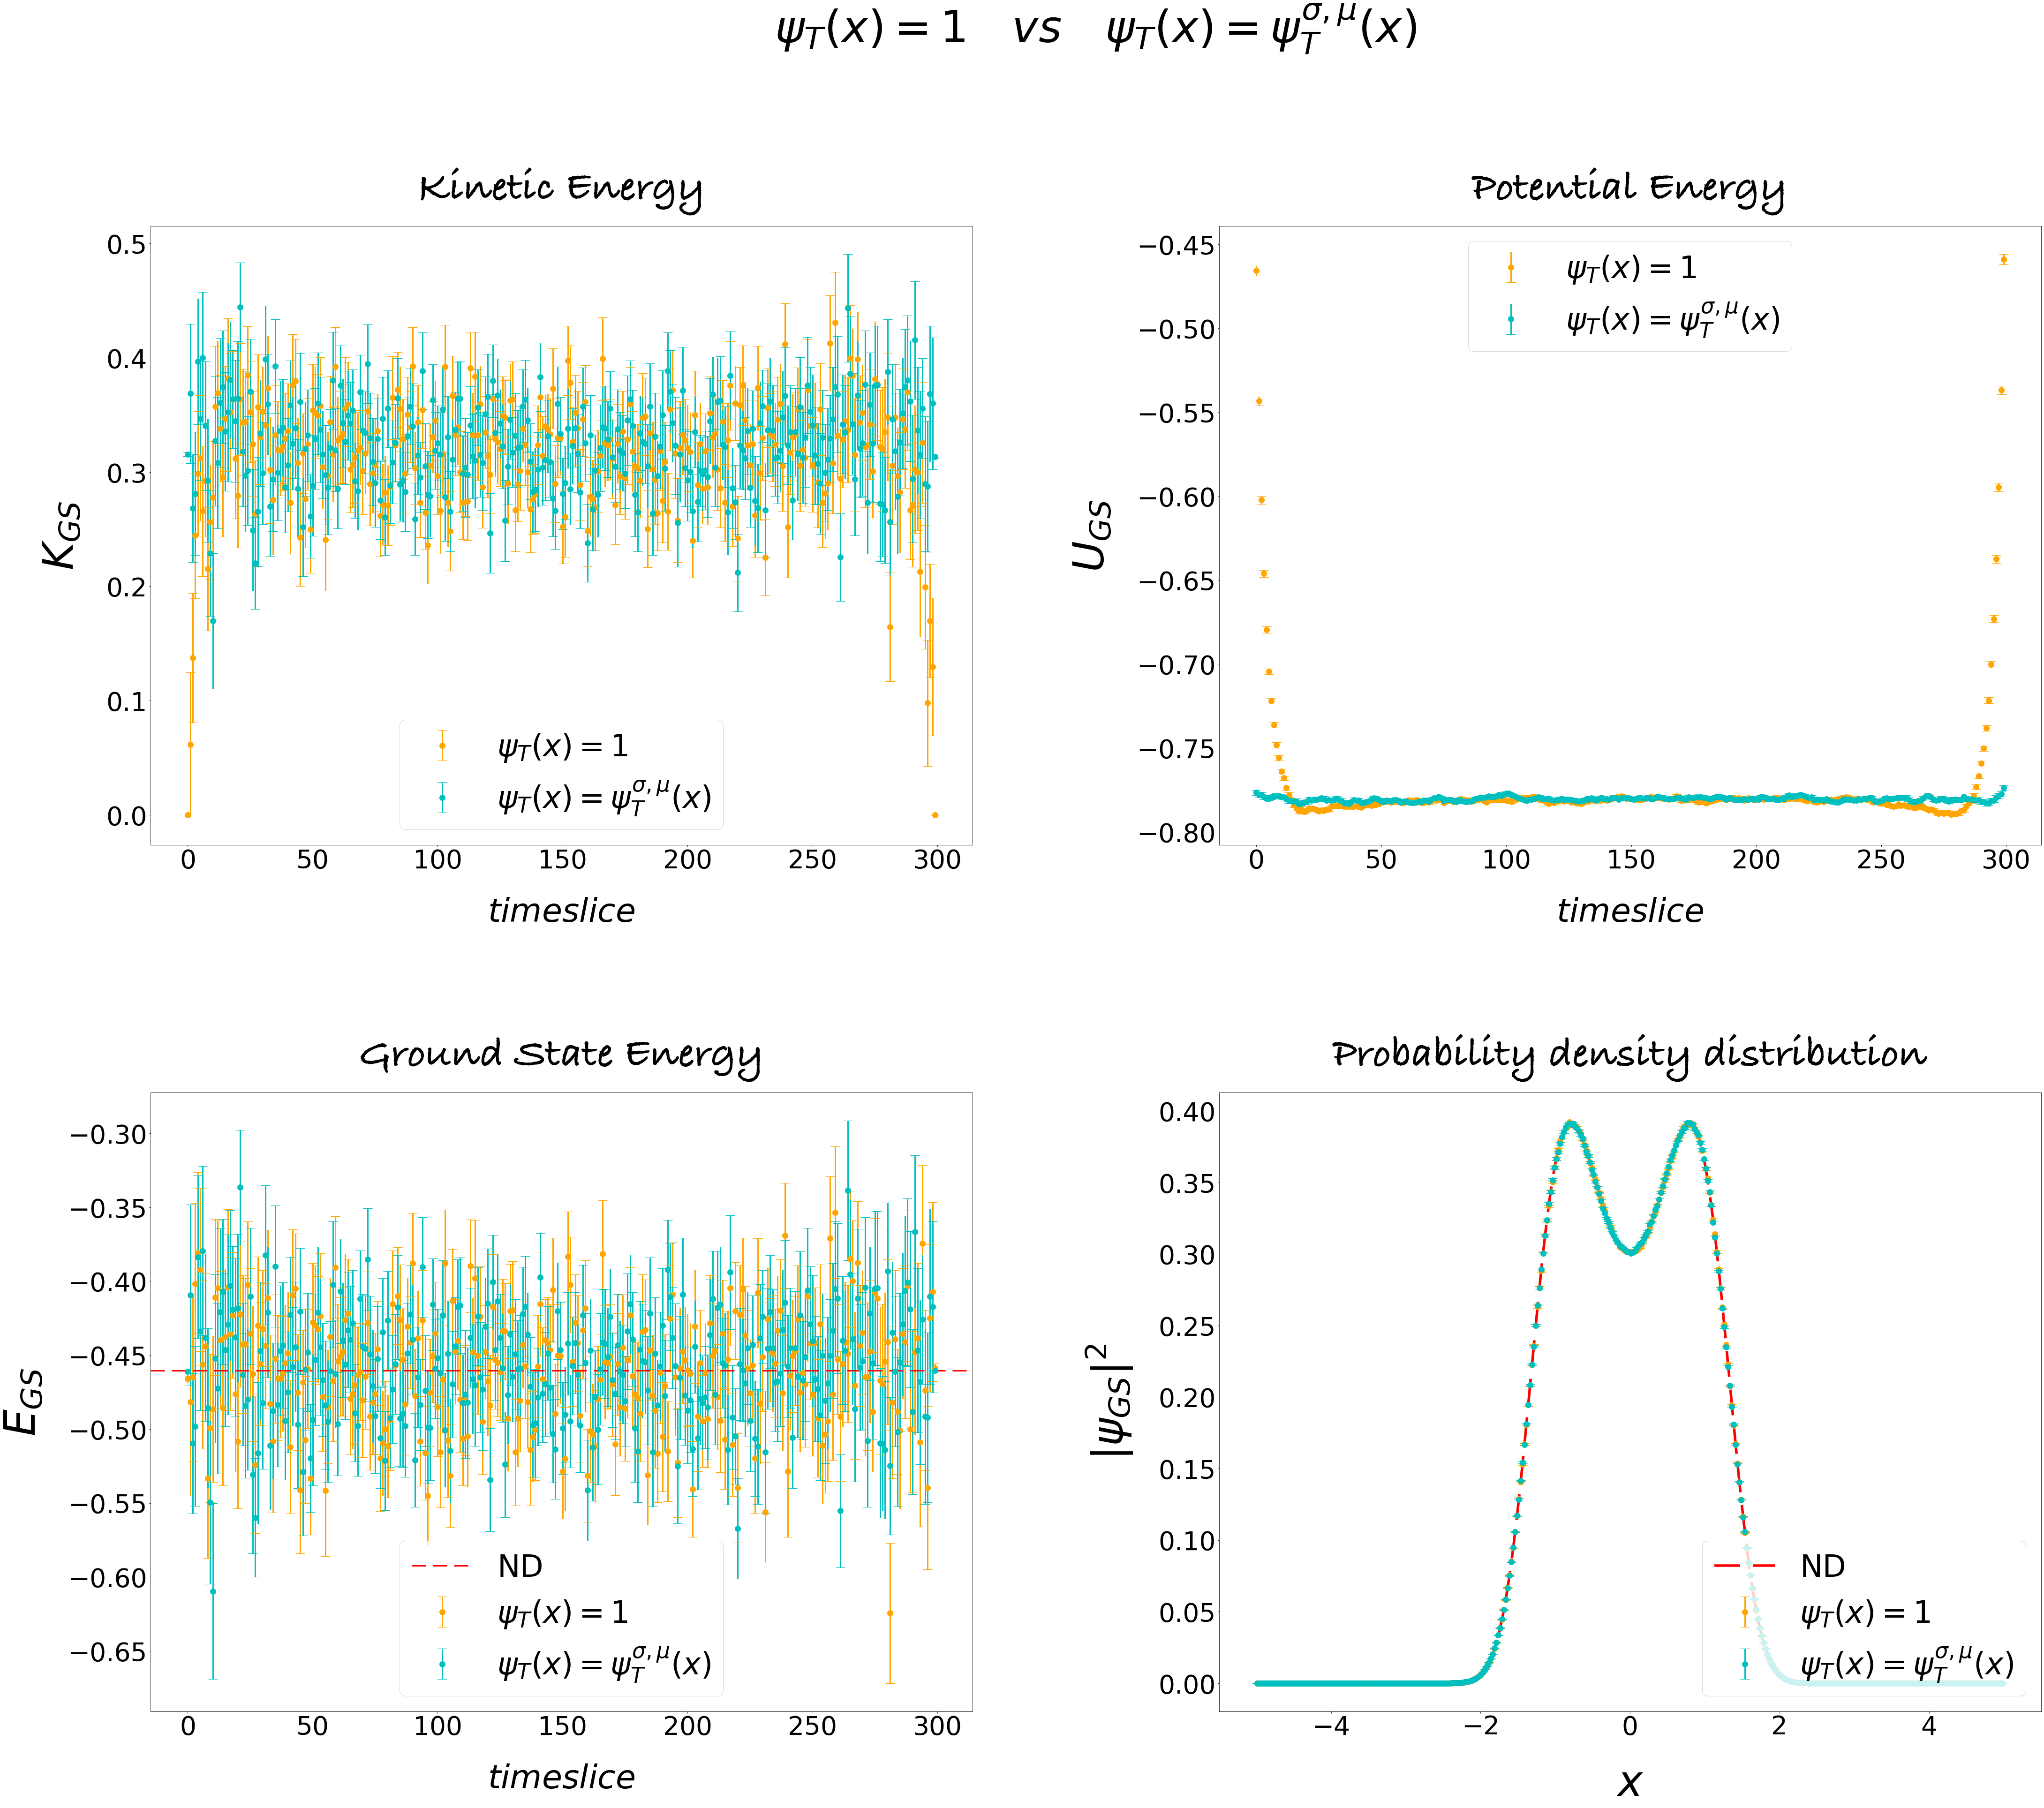

In [13]:
###################
#plots
###################
#Comparison between the two guesses
plt.figure(figsize=[70, 55])  #deafult (6.4,4.8)
plt.suptitle('$ \psi_T(x) = 1 \ \ \ vs \ \ \ \psi_T(x) = \psi_T^{\sigma, \mu}(x) $', y=1.02, 
             fontname = 'Bradley Hand', fontsize=95)

plt.subplot(2, 2, 1)
plt.title('Kinetic Energy', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$timeslice$', fontsize=70, labelpad=50)
plt.ylabel('$K_{GS}$', fontsize=90, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.errorbar(t, kinetic00_Cte, yerr=kinetic00_Cte_err, fmt='o', color='orange', elinewidth=3.0,
             markersize=12, capsize=10, label='$ \\psi_{T}(x) = 1 $')
plt.errorbar(t, kinetic00, yerr=kinetic00_err, fmt='oc', elinewidth=3.0,
             markersize=12, capsize=10, label='$ \\psi_{T}(x) = \psi^{\sigma, \mu}_T(x) $')
plt.legend(fontsize=65, loc='best')

plt.subplot(2, 2, 2)
plt.title('Potential Energy', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$timeslice$', fontsize=70, labelpad=50)
plt.ylabel('$U_{GS}$', fontsize=90, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.errorbar(t, potential00_Cte, yerr=potential00_Cte_err, fmt='o', color='orange', elinewidth=3.0,
             markersize=12, capsize=10, label='$ \\psi_{T}(x) = 1 $')
plt.errorbar(t, potential00, yerr=potential00_err, fmt='oc', elinewidth=3.0,
             markersize=12, capsize=10, label='$ \\psi_{T}(x) = \psi^{\sigma, \mu}_T(x) $')
plt.legend(fontsize=65, loc='best')

plt.subplot(2, 2, 3)
plt.title('Ground State Energy', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$timeslice$', fontsize=70, labelpad=50)
plt.ylabel('$E_{GS}$', fontsize=90, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.errorbar(t, energy00_Cte, yerr=energy00_Cte_err, fmt='o', color='orange', elinewidth=3.0,
             markersize=12, capsize=10, label='$ \\psi_{T}(x) = 1 $')
plt.errorbar(t, energy00, yerr=energy00_err, fmt='oc', elinewidth=3.0,
             markersize=12, capsize=10, label='$ \\psi_{T}(x) = \psi^{\sigma, \mu}_T(x) $')
plt.axhline(y=E[0], color='red', linewidth=3.0, linestyle='--', dashes=(10, 5), label='ND')
plt.legend(fontsize=65, loc='best')

plt.subplot(2, 2, 4)
plt.title('Probability density distribution', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$x$', fontsize=90, labelpad=50)
plt.ylabel('${\\vert {\psi}_{GS} \\vert}^2$', fontsize=90, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.errorbar(x00_Cte, pdf00_Cte, yerr=pdf00_Cte_err, fmt='o', color='orange', elinewidth=3.0,
             markersize=12, capsize=10, label='$ \\psi_{T}(x) = 1 $')
plt.errorbar(x00, pdf00, yerr=pdf00_err, fmt='oc', elinewidth=3.0,
             markersize=12, capsize=10, label='$ \psi_{T}(x) = \\psi^{\sigma, \mu}_T(x) $')
plt.plot(x,(psi[0])**2, color='red', linewidth=5.5, linestyle='--', dashes=(10, 5), label='ND')
plt.legend(fontsize=65, loc='lower right')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
plt.show()
print('\n\n')

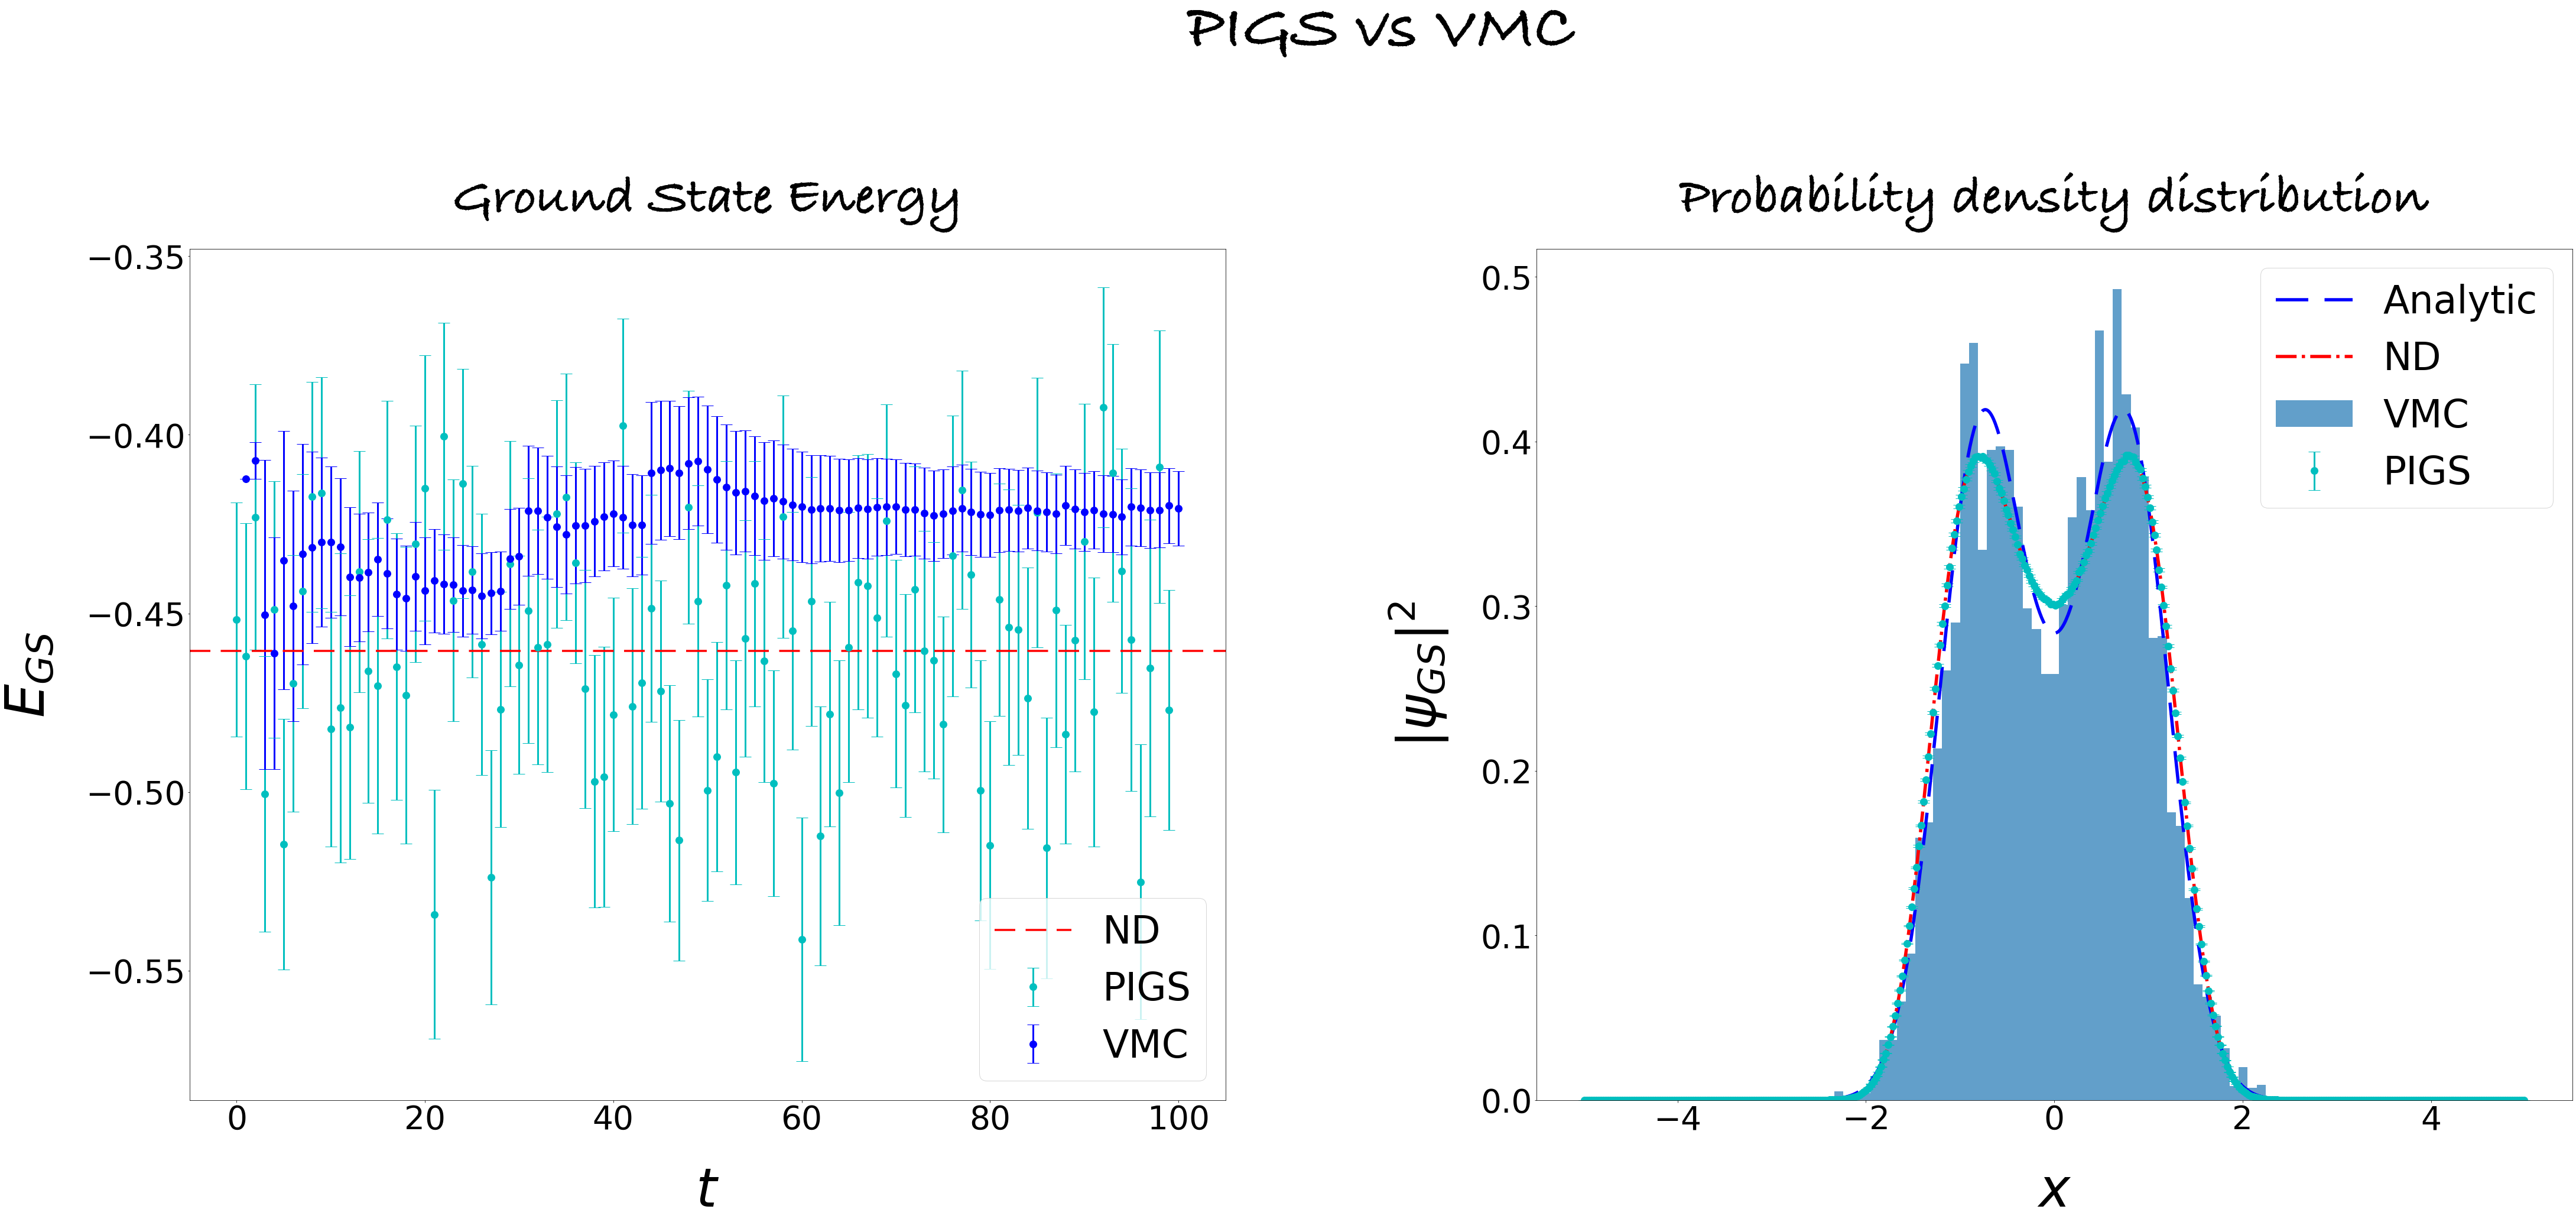

In [14]:
#Comparison with VMC
plt.figure(figsize=[70, 25])  #deafult (6.4,4.8)
plt.suptitle('PIGS vs VMC', y=1.13,fontname = 'Bradley Hand', fontsize=110)

plt.subplot(1, 2, 1)
plt.title('Ground State Energy', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$t$', fontsize=90, labelpad=50)
plt.ylabel('$E_{GS}$', fontsize=90, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.errorbar(t[100:200]-100, energy00[100:200], yerr=energy00_err[100:200], fmt='oc', elinewidth=3.0,
             markersize=12, capsize=10, label='PIGS')
plt.errorbar(N, ene, yerr=ene_err, fmt='ob', elinewidth=3.0,
             markersize=12, capsize=10, label='VMC')
plt.axhline(y=E[0], color='red', linewidth=3.5, linestyle='--', dashes=(10,  5), label='ND')
plt.legend(fontsize=65, loc='best')

plt.subplot(1, 2, 2)
plt.title('Probability density distribution', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$x$', fontsize=90, labelpad=50)
plt.ylabel('${\\vert {\psi}_{GS} \\vert}^2$', fontsize=90, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.errorbar(x00, pdf00, yerr=pdf00_err, fmt='oc', elinewidth=3.0,
             markersize=12, capsize=10, label='PIGS')
plt.hist(pdf, bins=50, density=True, alpha=0.7, label='VMC')
plt.plot(x_analytic, pdf_analytic, color='blue', linewidth=5.5,
         linestyle='--', dashes=(10, 5), label='Analytic')
plt.plot(x,(psi[0])**2, color='red', linewidth=5.5, linestyle='dashdot', label='ND')
plt.legend(fontsize=65, loc='best')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
plt.show()

The kinetic and potential energy plots clearly show that the energies computed with the *constant* variational wavefunction are affected by the little overlap between the guess and the real ground state, so much so that up to about the timeslice $ 50 $ and after the $ 250 $ the values are not comparable; on the other hand, in the approximately $ 200 $ remaining timeslices the two polymers move by statistically replicating the same zero point motion, which is in good agreement with the expected value, although there are some points a bit far from the <font color='red'>red dashed line</font>, as seen in the graph relating to the total ground state energy.
So the results that I show above describe the following behavior of the PIGS technique: the more the chosen trial wavefunction is different from that of the real gound state you are looking for, and the more imaginary time (timeslices) will take the algorithm to "clean up" the *bra* (the first left timeslices) and the *ket* (the last right timeslices) in the calculation of the (quantum) observables, having to remove a whole series of information present in the inaccurate variational guess as in the constant case; the peculiarity of the algorithm is that, after this initial imaginary time, it is able to sample the exact ground state of the system even if not knowing it! <br>
The last of the four plots, which is related to the sample probability density function, further highlights the correct zero point motion of the two ends of the open polymer in the central timeslices: between timeslice $ 120 $ and timeslice $ 180 $ the two sampled probability distributions are substantially identical and compatible with the one expected by the numerical solution (<font color='red'>red dashed line</font>).


The figures relating to the comparison between PIGS and VMC, on the other hand, make clear the goodness of the result found with the variational method, which is not only statistically comparable with the expected value (<font color='red'>red dashed line</font>), but also with the results produced by the exact technique that exploits path integral (I plot only the timeslices from $ 100 $ to $ 200 $ of the total $ 300 $).


Now I want to deepen the importance of making a good initial variational guess for the imaginary time projected wavefunction: both choices used above respect the *non-orthogonality* condition with the real ground state (obtained by numerical diagonalization); however, the constant wavefunction has very small overlap with the latter compared to the second choice $ \psi_T(x) = \psi_T^{\sigma, \mu}(x) $ (as you can see from the picture below).

<img src="08.3/Variational Guesses.png" width="500" align='center'>

For this reason we expect that the propagation in imaginary time of the starting state requires more time $ \tau $ when the overlap is small, because it will take more time to clean up all states other than the real ground state (as mentioned earlier): the larger the overlap, the less time it will take for the propagation, and therefore, with the same number of timeslices $ M $, the better will be the reconstruction of the properties of the fundamental state of the system. <br>
I carry out simulations in which I gradually decrease the propagation time $ \tau $ at $ M $ fixed to study this behavior, both for the constant guess and for the one optimized with the VMC code, and show the comparison between the two at various times. I decide to show not the total energy calculated, but the potential energy, in which it is more evident the projection on the real ground state of the bra and the ket as commented before.

In [15]:
###################
#load the data
###################
#imaginary propagation times
tau = np.array([7.0, 2.7, 1.3, 0.3, 0.05, 0.01])


#Constant Trial Wavefunction
kinetic00_Cte_1, kinetic00_Cte_1_err=np.loadtxt("08.3/T=0/7.0/kinetic_Cte_1.dat", usecols=(1, 2), unpack=True)
kinetic00_Cte_2, kinetic00_Cte_2_err=np.loadtxt("08.3/T=0/2.7/kinetic_Cte_2.dat", usecols=(1, 2), unpack=True)
kinetic00_Cte_3, kinetic00_Cte_3_err=np.loadtxt("08.3/T=0/1.3/kinetic_Cte_3.dat", usecols=(1, 2), unpack=True)
kinetic00_Cte_4, kinetic00_Cte_4_err=np.loadtxt("08.3/T=0/0.3/kinetic_Cte_4.dat", usecols=(1, 2), unpack=True)
kinetic00_Cte_5, kinetic00_Cte_5_err=np.loadtxt("08.3/T=0/0.05/kinetic_Cte_5.dat", usecols=(1, 2), unpack=True)
kinetic00_Cte_6, kinetic00_Cte_6_err=np.loadtxt("08.3/T=0/0.01/kinetic_Cte_6.dat", usecols=(1, 2), unpack=True)
potential00_Cte_1, potential00_Cte_1_err=np.loadtxt("08.3/T=0/7.0/potential_Cte_1.dat", usecols=(1, 2), unpack=True)
potential00_Cte_2, potential00_Cte_2_err=np.loadtxt("08.3/T=0/2.7/potential_Cte_2.dat", usecols=(1, 2), unpack=True)
potential00_Cte_3, potential00_Cte_3_err=np.loadtxt("08.3/T=0/1.3/potential_Cte_3.dat", usecols=(1, 2), unpack=True)
potential00_Cte_4, potential00_Cte_4_err=np.loadtxt("08.3/T=0/0.3/potential_Cte_4.dat", usecols=(1, 2), unpack=True)
potential00_Cte_5, potential00_Cte_5_err=np.loadtxt("08.3/T=0/0.05/potential_Cte_5.dat", usecols=(1, 2), unpack=True)
potential00_Cte_6, potential00_Cte_6_err=np.loadtxt("08.3/T=0/0.01/potential_Cte_6.dat", usecols=(1, 2), unpack=True)
x00_Cte_1, pdf00_Cte_1, pdf00_Cte_1_err=np.loadtxt("08.3/T=0/7.0/probability_Cte_1.dat", usecols=(0, 1, 2), unpack=True)
x00_Cte_2, pdf00_Cte_2, pdf00_Cte_2_err=np.loadtxt("08.3/T=0/2.7/probability_Cte_2.dat", usecols=(0, 1, 2), unpack=True)
x00_Cte_3, pdf00_Cte_3, pdf00_Cte_3_err=np.loadtxt("08.3/T=0/1.3/probability_Cte_3.dat", usecols=(0, 1, 2), unpack=True)
x00_Cte_4, pdf00_Cte_4, pdf00_Cte_4_err=np.loadtxt("08.3/T=0/0.3/probability_Cte_4.dat", usecols=(0, 1, 2), unpack=True)
x00_Cte_5, pdf00_Cte_5, pdf00_Cte_5_err=np.loadtxt("08.3/T=0/0.05/probability_Cte_5.dat", usecols=(0, 1, 2), unpack=True)
x00_Cte_6, pdf00_Cte_6, pdf00_Cte_6_err=np.loadtxt("08.3/T=0/0.01/probability_Cte_6.dat", usecols=(0, 1, 2), unpack=True)
energy00_Cte_1 = kinetic00_Cte_1 + potential00_Cte_1
energy00_Cte_2 = kinetic00_Cte_2 + potential00_Cte_2
energy00_Cte_3 = kinetic00_Cte_3 + potential00_Cte_3
energy00_Cte_4 = kinetic00_Cte_4 + potential00_Cte_4
energy00_Cte_5 = kinetic00_Cte_5 + potential00_Cte_5
energy00_Cte_6 = kinetic00_Cte_6 + potential00_Cte_6
energy00_Cte_1_err = np.sqrt(kinetic00_Cte_1_err**2 + potential00_Cte_1_err**2)  #Propagation of errors   
energy00_Cte_2_err = np.sqrt(kinetic00_Cte_2_err**2 + potential00_Cte_2_err**2)  #for uncorrelated observables
energy00_Cte_3_err = np.sqrt(kinetic00_Cte_3_err**2 + potential00_Cte_3_err**2)
energy00_Cte_4_err = np.sqrt(kinetic00_Cte_4_err**2 + potential00_Cte_4_err**2)
energy00_Cte_5_err = np.sqrt(kinetic00_Cte_5_err**2 + potential00_Cte_5_err**2)
energy00_Cte_6_err = np.sqrt(kinetic00_Cte_6_err**2 + potential00_Cte_6_err**2)


#Variational Optimized Trial Wavefunction
kinetic00_1, kinetic00_1_err=np.loadtxt("08.3/T=0/7.0/kinetic_1.dat", usecols=(1, 2), unpack=True)
kinetic00_2, kinetic00_2_err=np.loadtxt("08.3/T=0/2.7/kinetic_2.dat", usecols=(1, 2), unpack=True)
kinetic00_3, kinetic00_3_err=np.loadtxt("08.3/T=0/1.3/kinetic_3.dat", usecols=(1, 2), unpack=True)
kinetic00_4, kinetic00_4_err=np.loadtxt("08.3/T=0/0.3/kinetic_4.dat", usecols=(1, 2), unpack=True)
kinetic00_5, kinetic00_5_err=np.loadtxt("08.3/T=0/0.05/kinetic_5.dat", usecols=(1, 2), unpack=True)
kinetic00_6, kinetic00_6_err=np.loadtxt("08.3/T=0/0.01/kinetic_6.dat", usecols=(1, 2), unpack=True)
potential00_1, potential00_1_err=np.loadtxt("08.3/T=0/7.0/potential_1.dat", usecols=(1, 2), unpack=True)
potential00_2, potential00_2_err=np.loadtxt("08.3/T=0/2.7/potential_2.dat", usecols=(1, 2), unpack=True)
potential00_3, potential00_3_err=np.loadtxt("08.3/T=0/1.3/potential_3.dat", usecols=(1, 2), unpack=True)
potential00_4, potential00_4_err=np.loadtxt("08.3/T=0/0.3/potential_4.dat", usecols=(1, 2), unpack=True)
potential00_5, potential00_5_err=np.loadtxt("08.3/T=0/0.05/potential_5.dat", usecols=(1, 2), unpack=True)
potential00_6, potential00_6_err=np.loadtxt("08.3/T=0/0.01/potential_6.dat", usecols=(1, 2), unpack=True)
x00_1, pdf00_1, pdf00_1_err=np.loadtxt("08.3/T=0/7.0/probability_1.dat", usecols=(0, 1, 2), unpack=True)
x00_2, pdf00_2, pdf00_2_err=np.loadtxt("08.3/T=0/2.7/probability_2.dat", usecols=(0, 1, 2), unpack=True)
x00_3, pdf00_3, pdf00_3_err=np.loadtxt("08.3/T=0/1.3/probability_3.dat", usecols=(0, 1, 2), unpack=True)
x00_4, pdf00_4, pdf00_4_err=np.loadtxt("08.3/T=0/0.3/probability_4.dat", usecols=(0, 1, 2), unpack=True)
x00_5, pdf00_5, pdf00_5_err=np.loadtxt("08.3/T=0/0.05/probability_5.dat", usecols=(0, 1, 2), unpack=True)
x00_6, pdf00_6, pdf00_6_err=np.loadtxt("08.3/T=0/0.01/probability_6.dat", usecols=(0, 1, 2), unpack=True)
energy00_1 = kinetic00_1 + potential00_1
energy00_2 = kinetic00_2 + potential00_2
energy00_3 = kinetic00_3 + potential00_3
energy00_4 = kinetic00_4 + potential00_4
energy00_5 = kinetic00_5 + potential00_5
energy00_6 = kinetic00_6 + potential00_6
energy00_1_err = np.sqrt(kinetic00_1_err**2 + potential00_1_err**2)  #Propagation of errors   
energy00_2_err = np.sqrt(kinetic00_2_err**2 + potential00_2_err**2)  #for uncorrelated observables
energy00_3_err = np.sqrt(kinetic00_3_err**2 + potential00_3_err**2)
energy00_4_err = np.sqrt(kinetic00_4_err**2 + potential00_4_err**2)
energy00_5_err = np.sqrt(kinetic00_5_err**2 + potential00_5_err**2)
energy00_6_err = np.sqrt(kinetic00_6_err**2 + potential00_6_err**2)

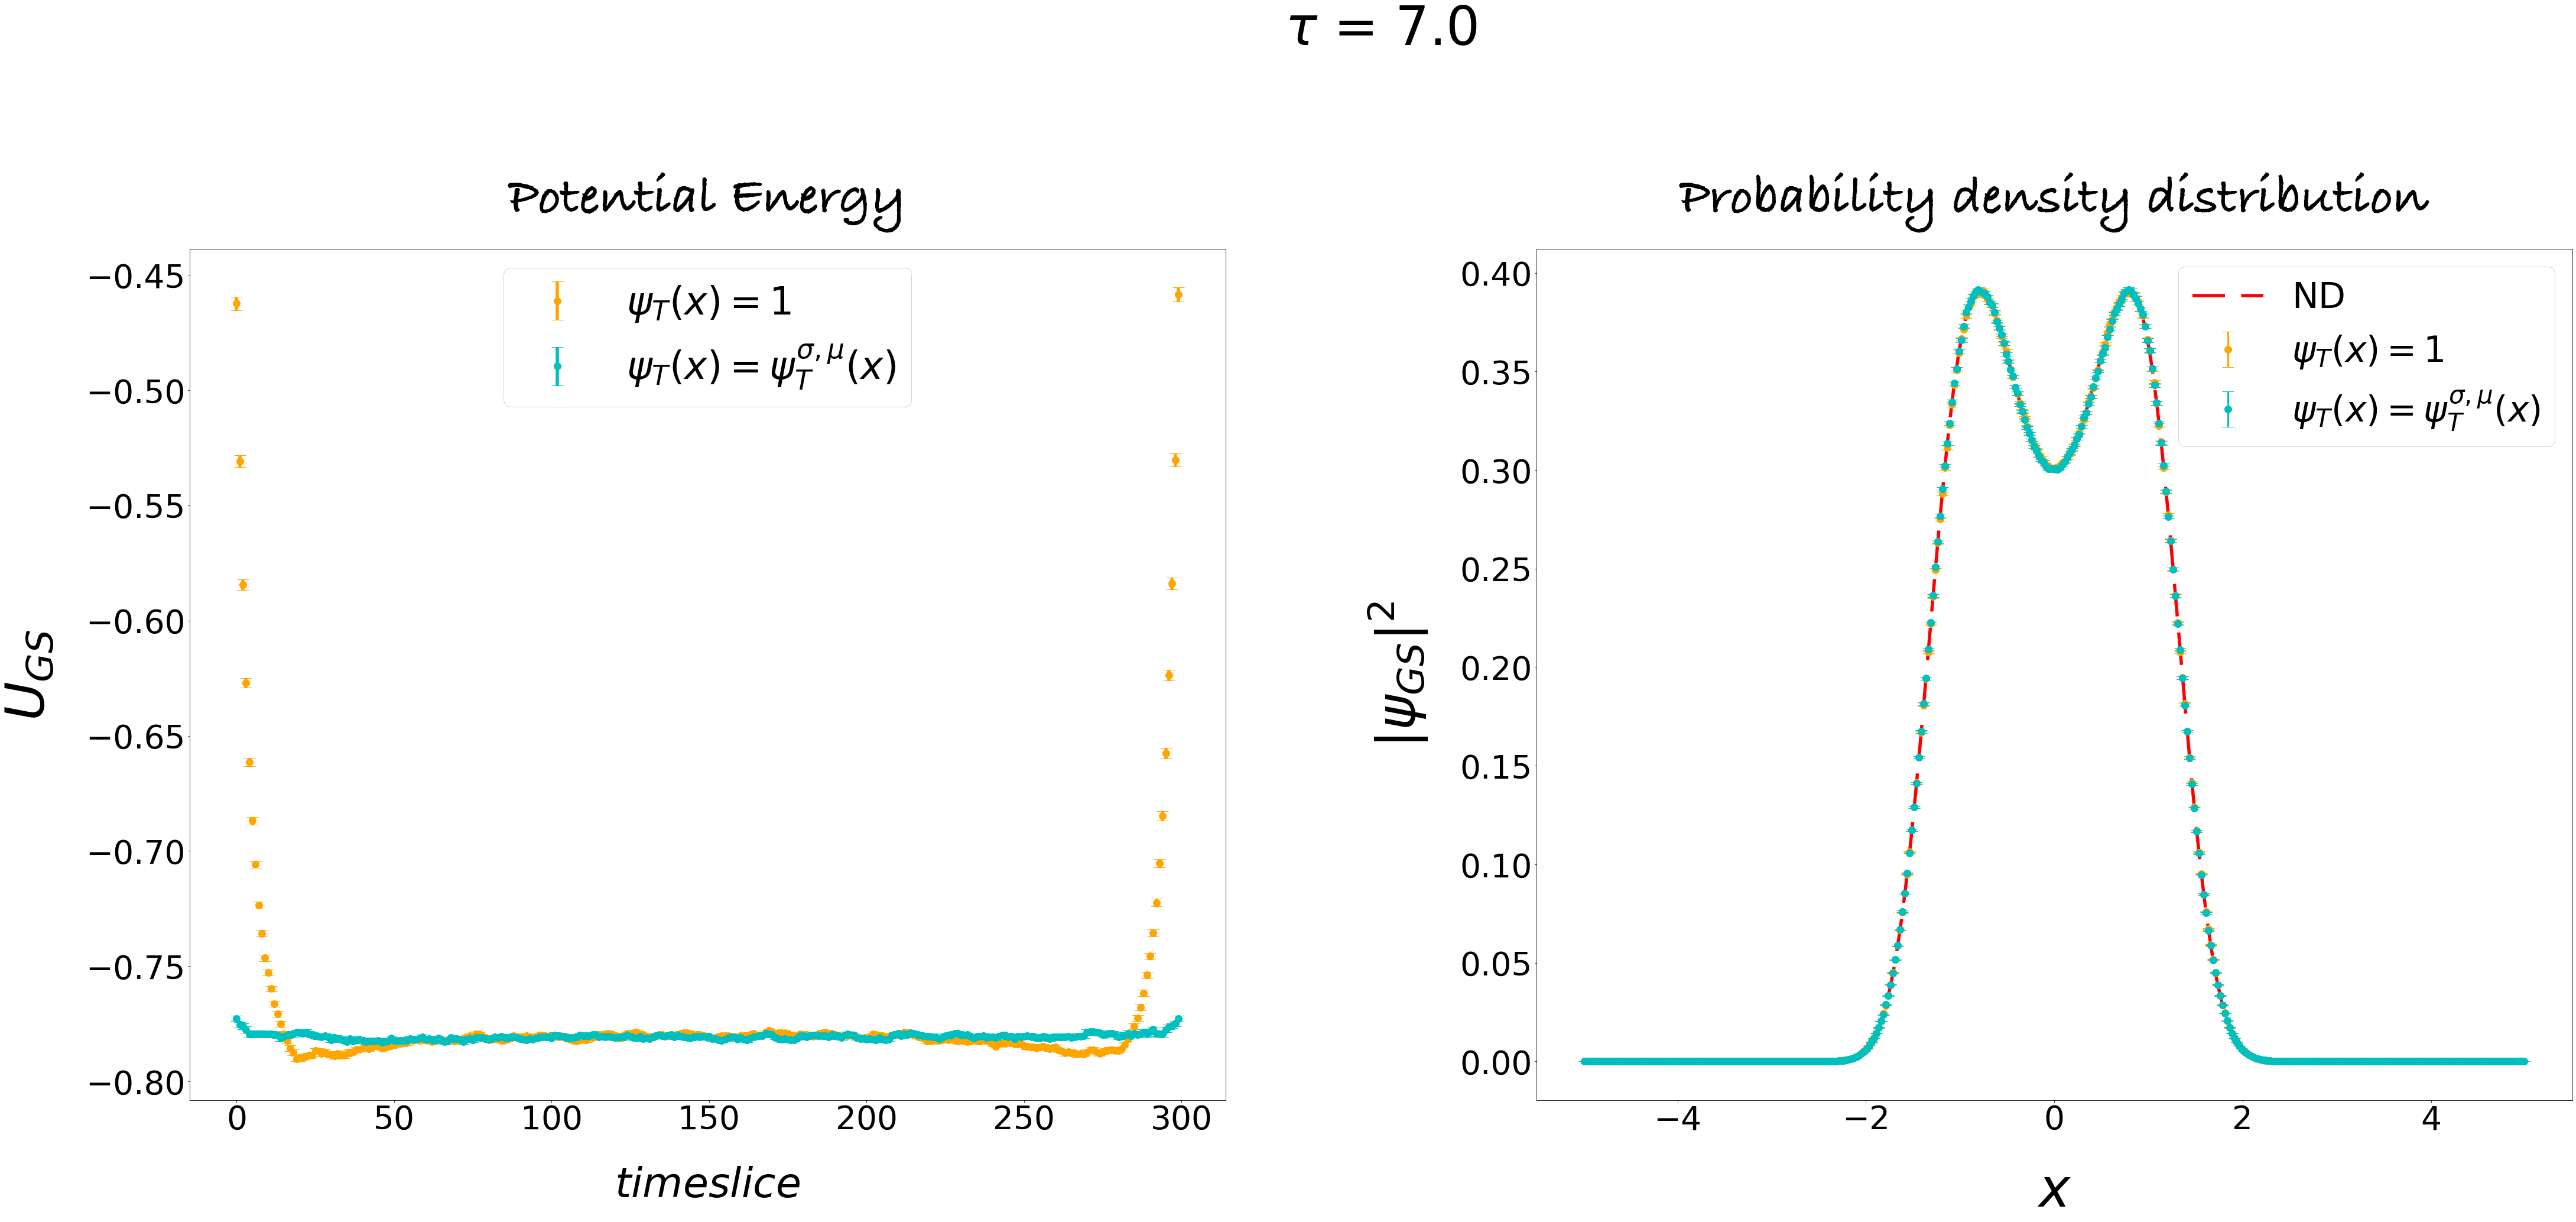

In [16]:
###################
#plots
###################
#Comparison between the two guesses
###
#𝜏 = 7.0
###
plt.figure(figsize=[70, 25])  #deafult (6.4,4.8)
plt.suptitle('$\\tau$ = $7.0$', y=1.13, fontsize=90)

plt.subplot(1, 2, 1)
plt.title('Potential Energy', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$timeslice$', fontsize=70, labelpad=50)
plt.ylabel('$U_{GS}$', fontsize=90, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.errorbar(t, potential00_Cte_1, yerr=potential00_Cte_1_err, fmt='o', color='orange',
             elinewidth=5.5, markersize=12, capsize=10, label='$ \\psi_{T}(x) = 1 $')
plt.errorbar(t, potential00_1, yerr=potential00_1_err, fmt='oc', elinewidth=5.5,
             markersize=12, capsize=10, label='$ \\psi_{T}(x) = \psi^{\sigma, \mu}_T(x) $')
plt.legend(fontsize=65, loc='best')

plt.subplot(1, 2, 2)
plt.title('Probability density distribution', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$x$', fontsize=90, labelpad=50)
plt.ylabel('${\\vert {\psi}_{GS} \\vert}^2$', fontsize=90, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.errorbar(x00_Cte_1, pdf00_Cte_1, yerr=pdf00_Cte_1_err, fmt='o', color='orange',
             elinewidth=3.0, markersize=12, capsize=10, label='$ \\psi_{T}(x) = 1 $')
plt.errorbar(x00_1, pdf00_1, yerr=pdf00_1_err, fmt='oc', elinewidth=3.0,
             markersize=12, capsize=10, label='$ \psi_{T}(x) = \\psi^{\sigma, \mu}_T(x) $')
plt.plot(x,(psi[0])**2, color='red', linewidth=5.5, linestyle='--', dashes=(10, 5), label='ND')
plt.legend(fontsize=60, loc='best')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
plt.show()
print('\n')

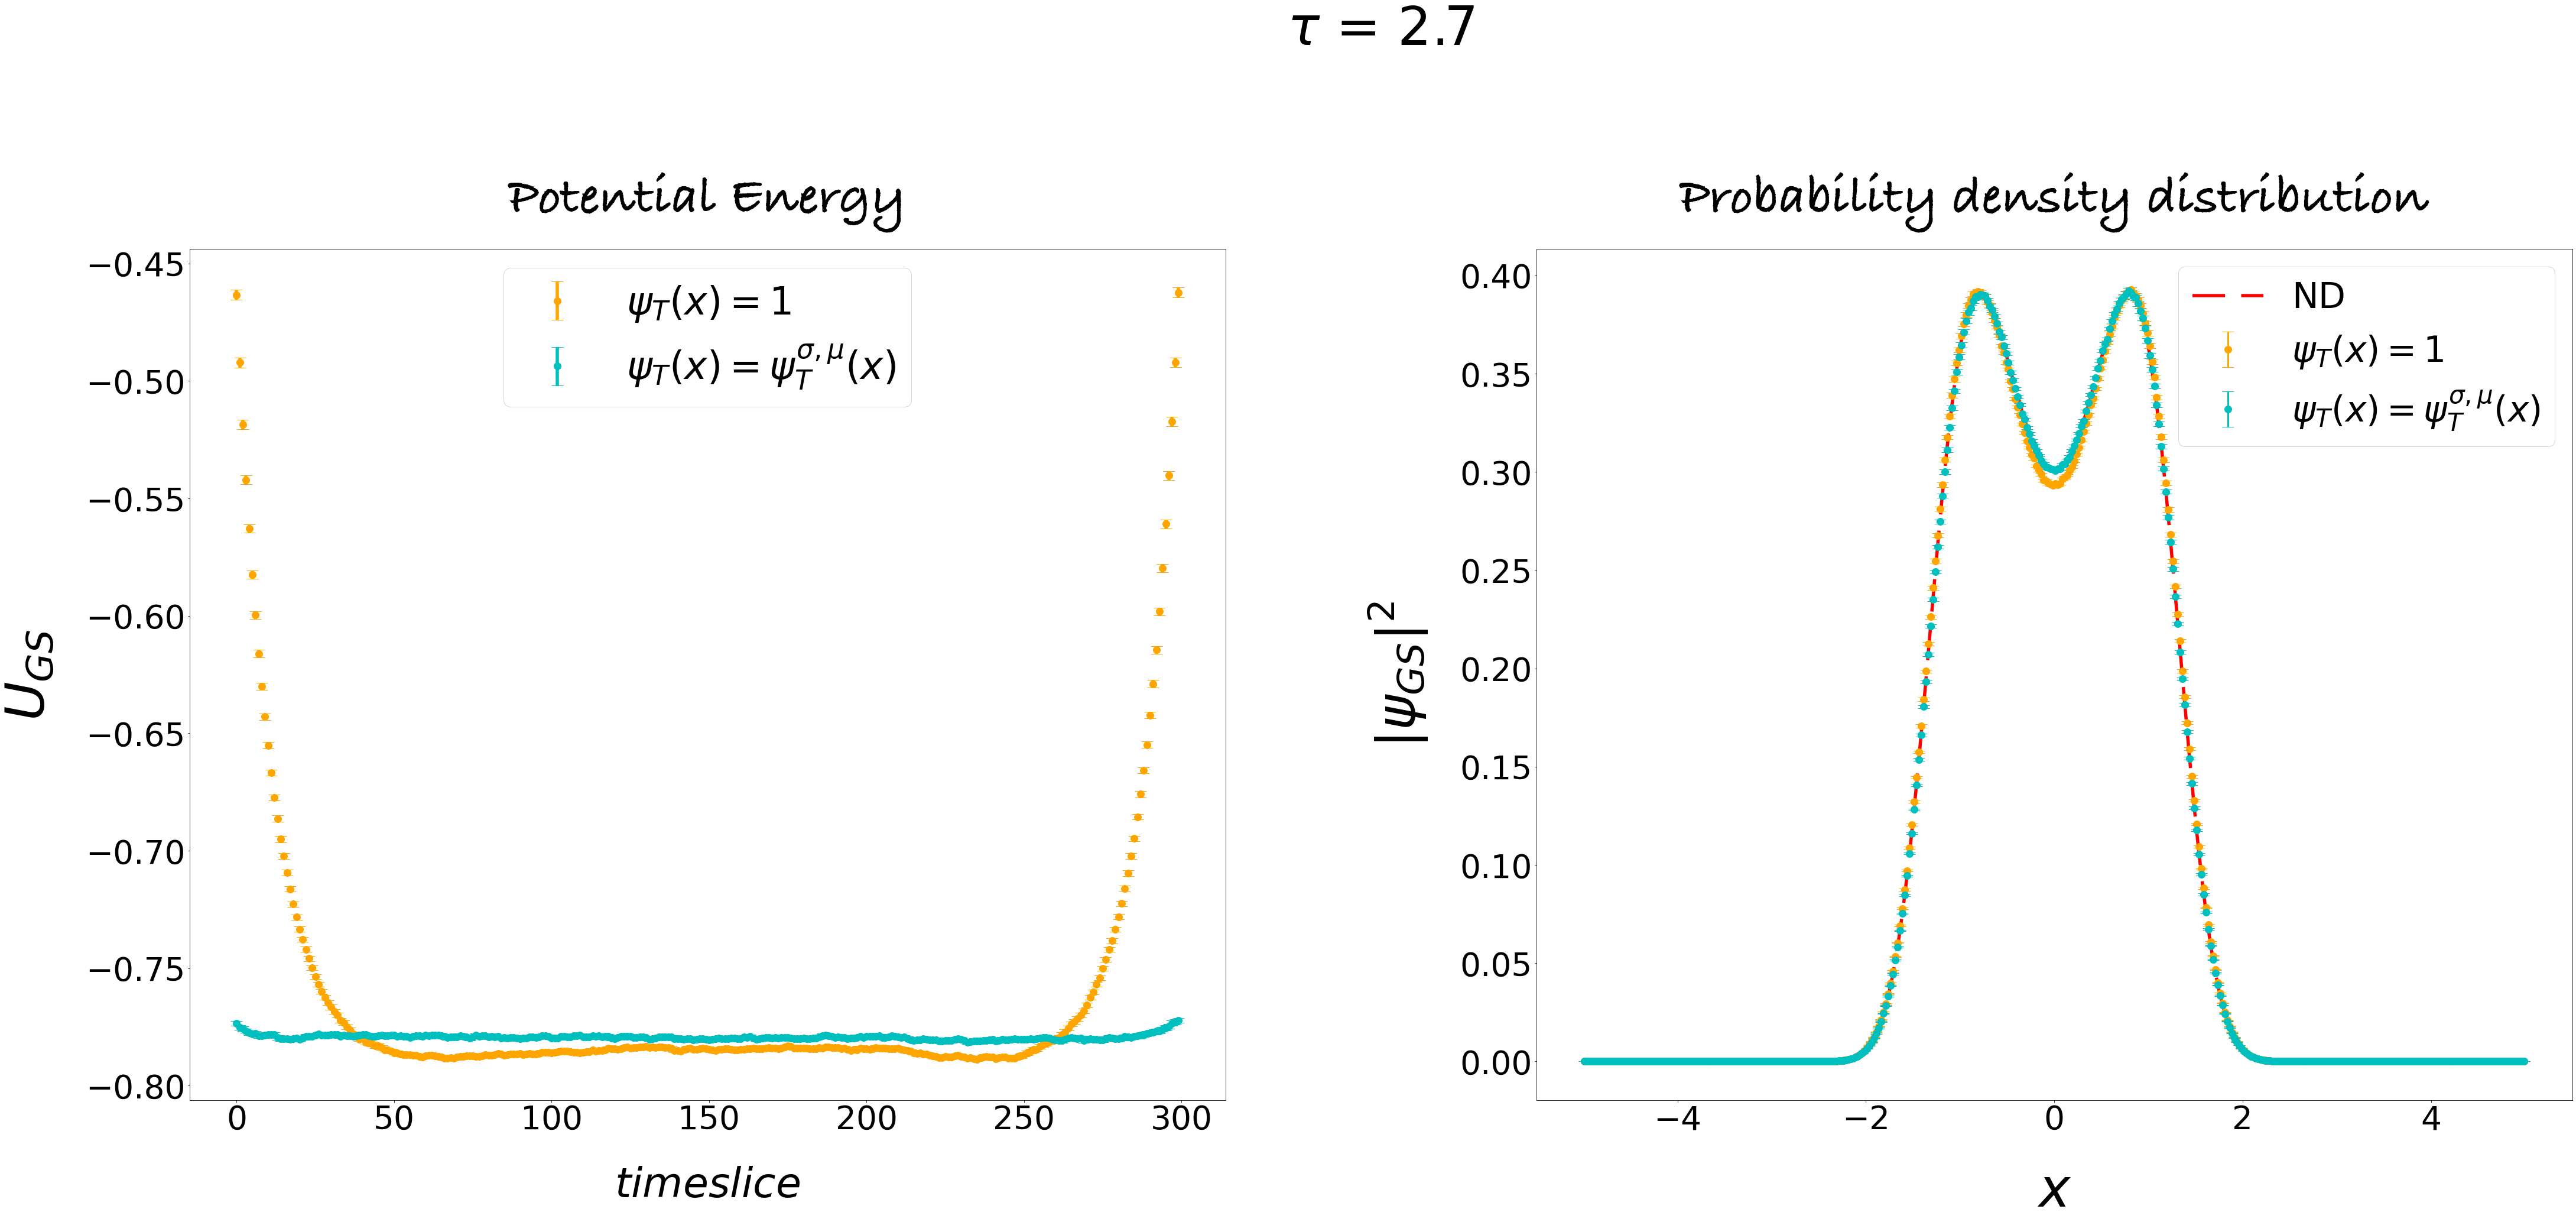

In [17]:
###
#𝜏 = 2.7
###
plt.figure(figsize=[70, 25])  #deafult (6.4,4.8)
plt.suptitle('$\\tau$ = $2.7$', y=1.13, fontsize=90)

plt.subplot(1, 2, 1)
plt.title('Potential Energy', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$timeslice$', fontsize=70, labelpad=50)
plt.ylabel('$U_{GS}$', fontsize=90, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.errorbar(t, potential00_Cte_2, yerr=potential00_Cte_2_err, fmt='o', color='orange',
             elinewidth=5.5, markersize=12, capsize=10, label='$ \\psi_{T}(x) = 1 $')
plt.errorbar(t, potential00_2, yerr=potential00_2_err, fmt='oc', elinewidth=5.5,
             markersize=12, capsize=10, label='$ \\psi_{T}(x) = \psi^{\sigma, \mu}_T(x) $')
plt.legend(fontsize=65, loc='best')

plt.subplot(1, 2, 2)
plt.title('Probability density distribution', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$x$', fontsize=90, labelpad=50)
plt.ylabel('${\\vert {\psi}_{GS} \\vert}^2$', fontsize=90, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.errorbar(x00_Cte_2, pdf00_Cte_2, yerr=pdf00_Cte_2_err, fmt='o', color='orange',
             elinewidth=3.0, markersize=12, capsize=10, label='$ \\psi_{T}(x) = 1 $')
plt.errorbar(x00_2, pdf00_2, yerr=pdf00_2_err, fmt='oc', elinewidth=3.0,
             markersize=12, capsize=10, label='$ \psi_{T}(x) = \\psi^{\sigma, \mu}_T(x) $')
plt.plot(x,(psi[0])**2, color='red', linewidth=5.5, linestyle='--', dashes=(10, 5), label='ND')
plt.legend(fontsize=60, loc='best')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
plt.show()
print('\n')

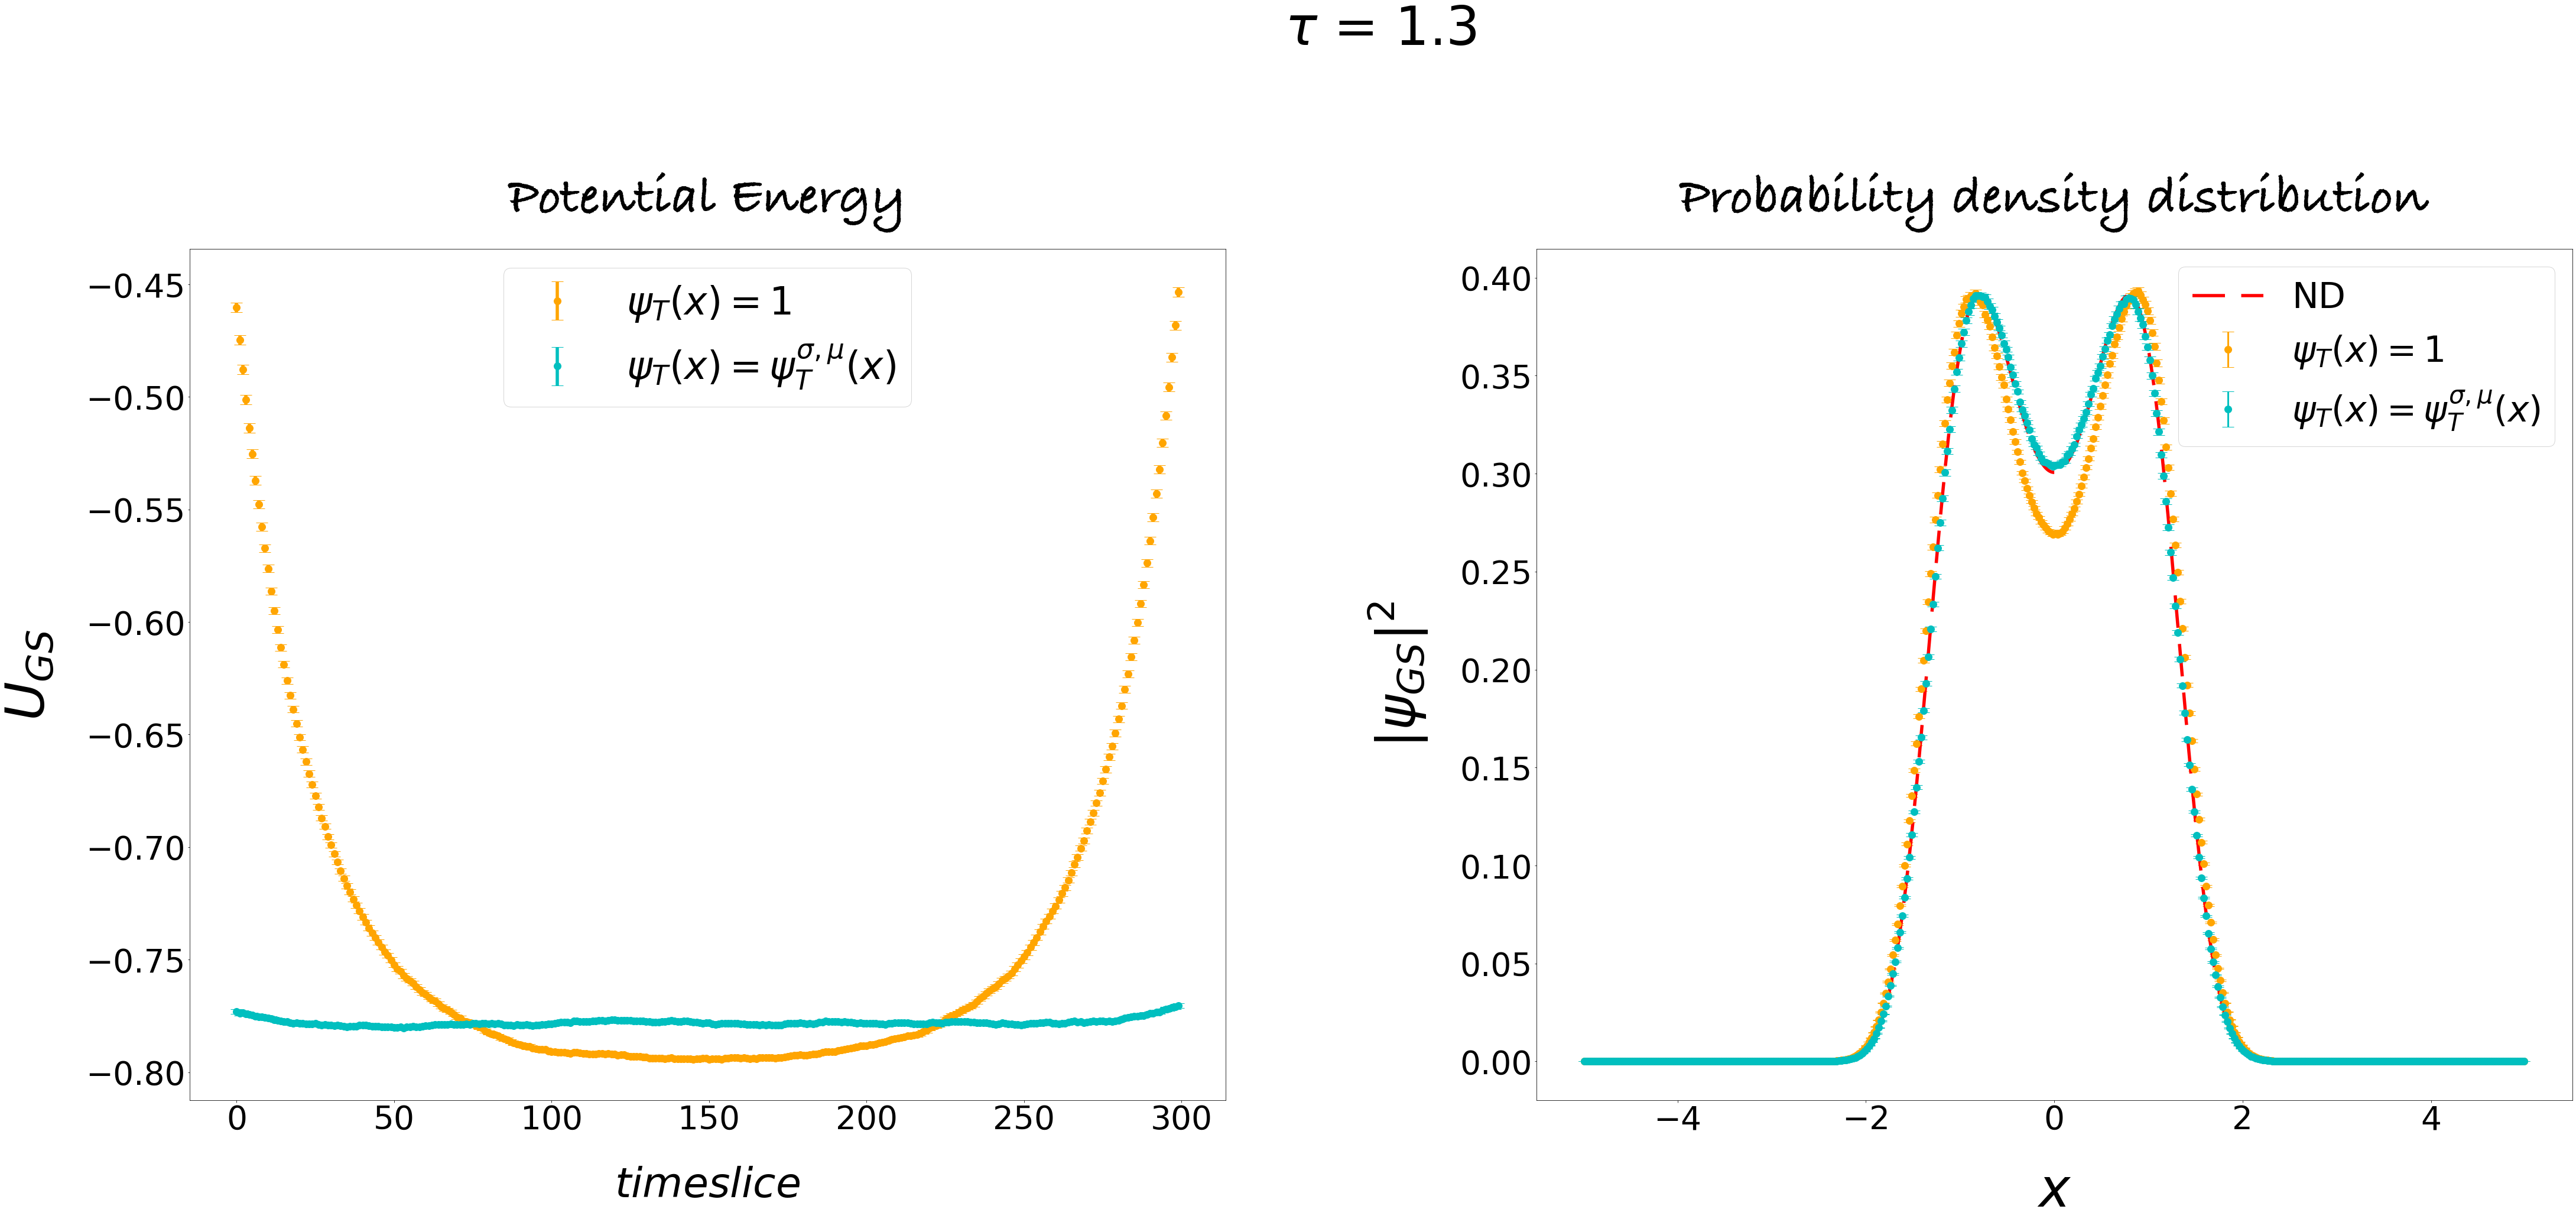

In [18]:
###
#𝜏 = 1.3
###
plt.figure(figsize=[70, 25])  #deafult (6.4,4.8)
plt.suptitle('$\\tau$ = $1.3$', y=1.13, fontsize=90)

plt.subplot(1, 2, 1)
plt.title('Potential Energy', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$timeslice$', fontsize=70, labelpad=50)
plt.ylabel('$U_{GS}$', fontsize=90, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.errorbar(t, potential00_Cte_3, yerr=potential00_Cte_3_err, fmt='o', color='orange',
             elinewidth=5.5, markersize=12, capsize=10, label='$ \\psi_{T}(x) = 1 $')
plt.errorbar(t, potential00_3, yerr=potential00_3_err, fmt='oc', elinewidth=5.5,
             markersize=12, capsize=10, label='$ \\psi_{T}(x) = \psi^{\sigma, \mu}_T(x) $')
plt.legend(fontsize=65, loc='best')

plt.subplot(1, 2, 2)
plt.title('Probability density distribution', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$x$', fontsize=90, labelpad=50)
plt.ylabel('${\\vert {\psi}_{GS} \\vert}^2$', fontsize=90, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.errorbar(x00_Cte_3, pdf00_Cte_3, yerr=pdf00_Cte_3_err, fmt='o', color='orange',
             elinewidth=3.0, markersize=12, capsize=10, label='$ \\psi_{T}(x) = 1 $')
plt.errorbar(x00_3, pdf00_3, yerr=pdf00_3_err, fmt='oc', elinewidth=3.0,
             markersize=12, capsize=10, label='$ \psi_{T}(x) = \\psi^{\sigma, \mu}_T(x) $')
plt.plot(x,(psi[0])**2, color='red', linewidth=5.5, linestyle='--', dashes=(10, 5), label='ND')
plt.legend(fontsize=60, loc='best')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
plt.show()
print('\n')

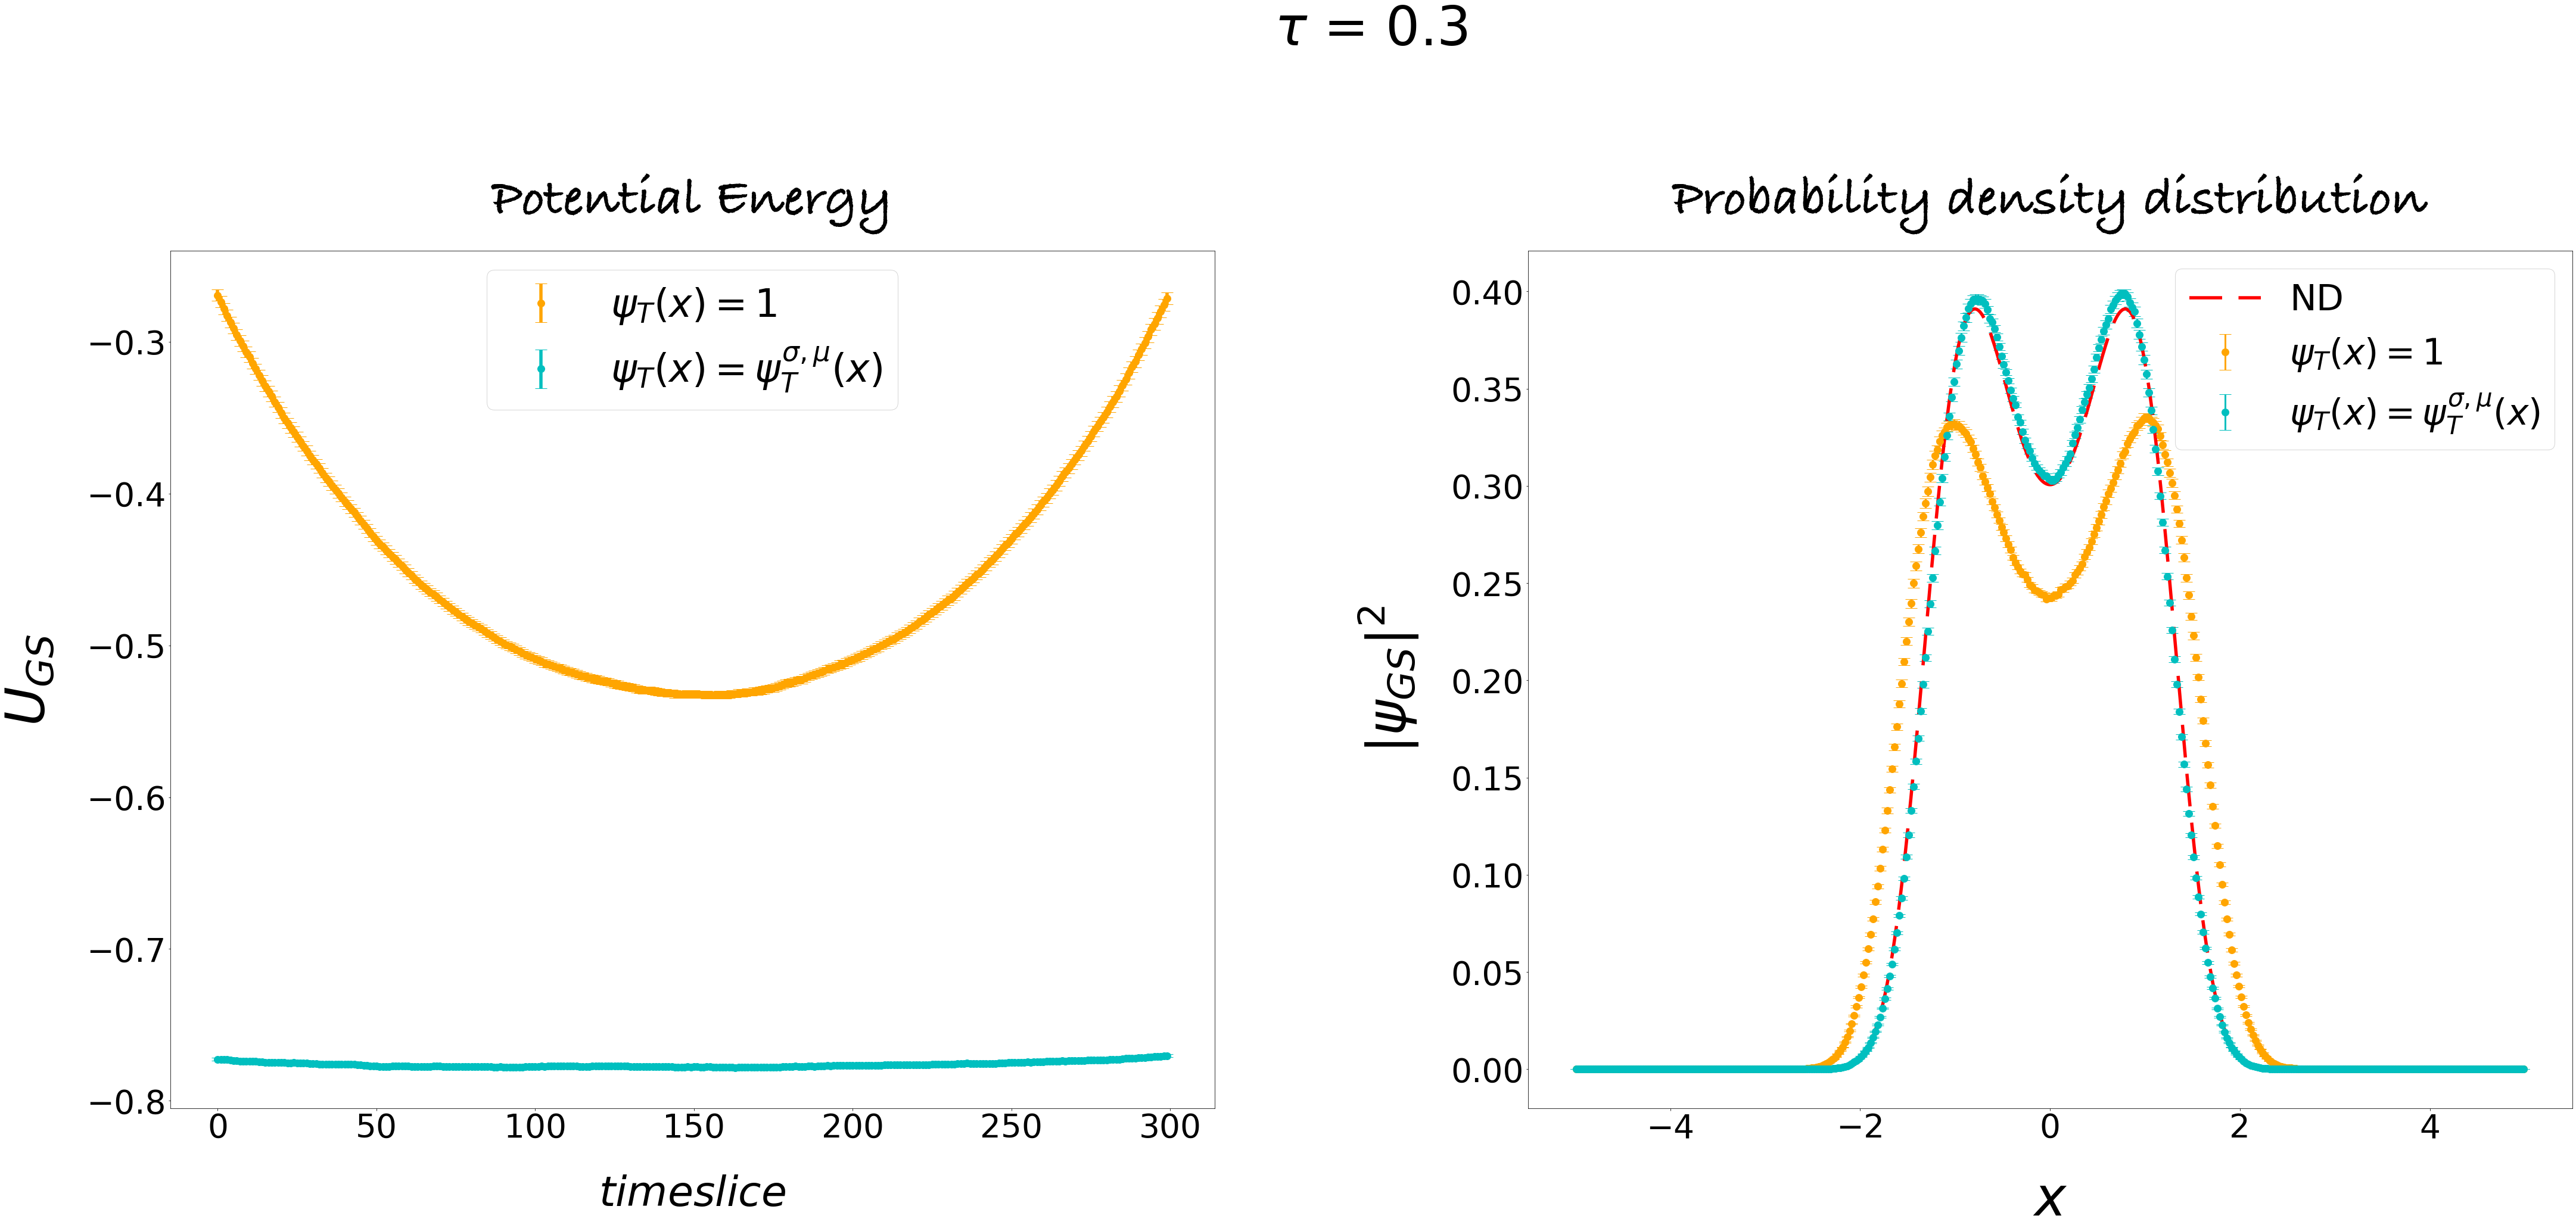

In [19]:
###
#𝜏 = 0.3
###
plt.figure(figsize=[70, 25])  #deafult (6.4,4.8)
plt.suptitle('$\\tau$ = $0.3$', y=1.13, fontsize=90)

plt.subplot(1, 2, 1)
plt.title('Potential Energy', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$timeslice$', fontsize=70, labelpad=50)
plt.ylabel('$U_{GS}$', fontsize=90, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.errorbar(t, potential00_Cte_4, yerr=potential00_Cte_4_err, fmt='o', color='orange',
             elinewidth=5.5, markersize=12, capsize=10, label='$ \\psi_{T}(x) = 1 $')
plt.errorbar(t, potential00_4, yerr=potential00_4_err, fmt='oc', elinewidth=5.5,
             markersize=12, capsize=10, label='$ \\psi_{T}(x) = \psi^{\sigma, \mu}_T(x) $')
plt.legend(fontsize=65, loc='best')

plt.subplot(1, 2, 2)
plt.title('Probability density distribution', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$x$', fontsize=90, labelpad=50)
plt.ylabel('${\\vert {\psi}_{GS} \\vert}^2$', fontsize=90, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.errorbar(x00_Cte_4, pdf00_Cte_4, yerr=pdf00_Cte_4_err, fmt='o', color='orange',
             elinewidth=3.0, markersize=12, capsize=10, label='$ \\psi_{T}(x) = 1 $')
plt.errorbar(x00_4, pdf00_4, yerr=pdf00_4_err, fmt='oc', elinewidth=3.0,
             markersize=12, capsize=10, label='$ \psi_{T}(x) = \\psi^{\sigma, \mu}_T(x) $')
plt.plot(x,(psi[0])**2, color='red', linewidth=5.5, linestyle='--', dashes=(10, 5), label='ND')
plt.legend(fontsize=60, loc='best')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
plt.show()
print('\n')

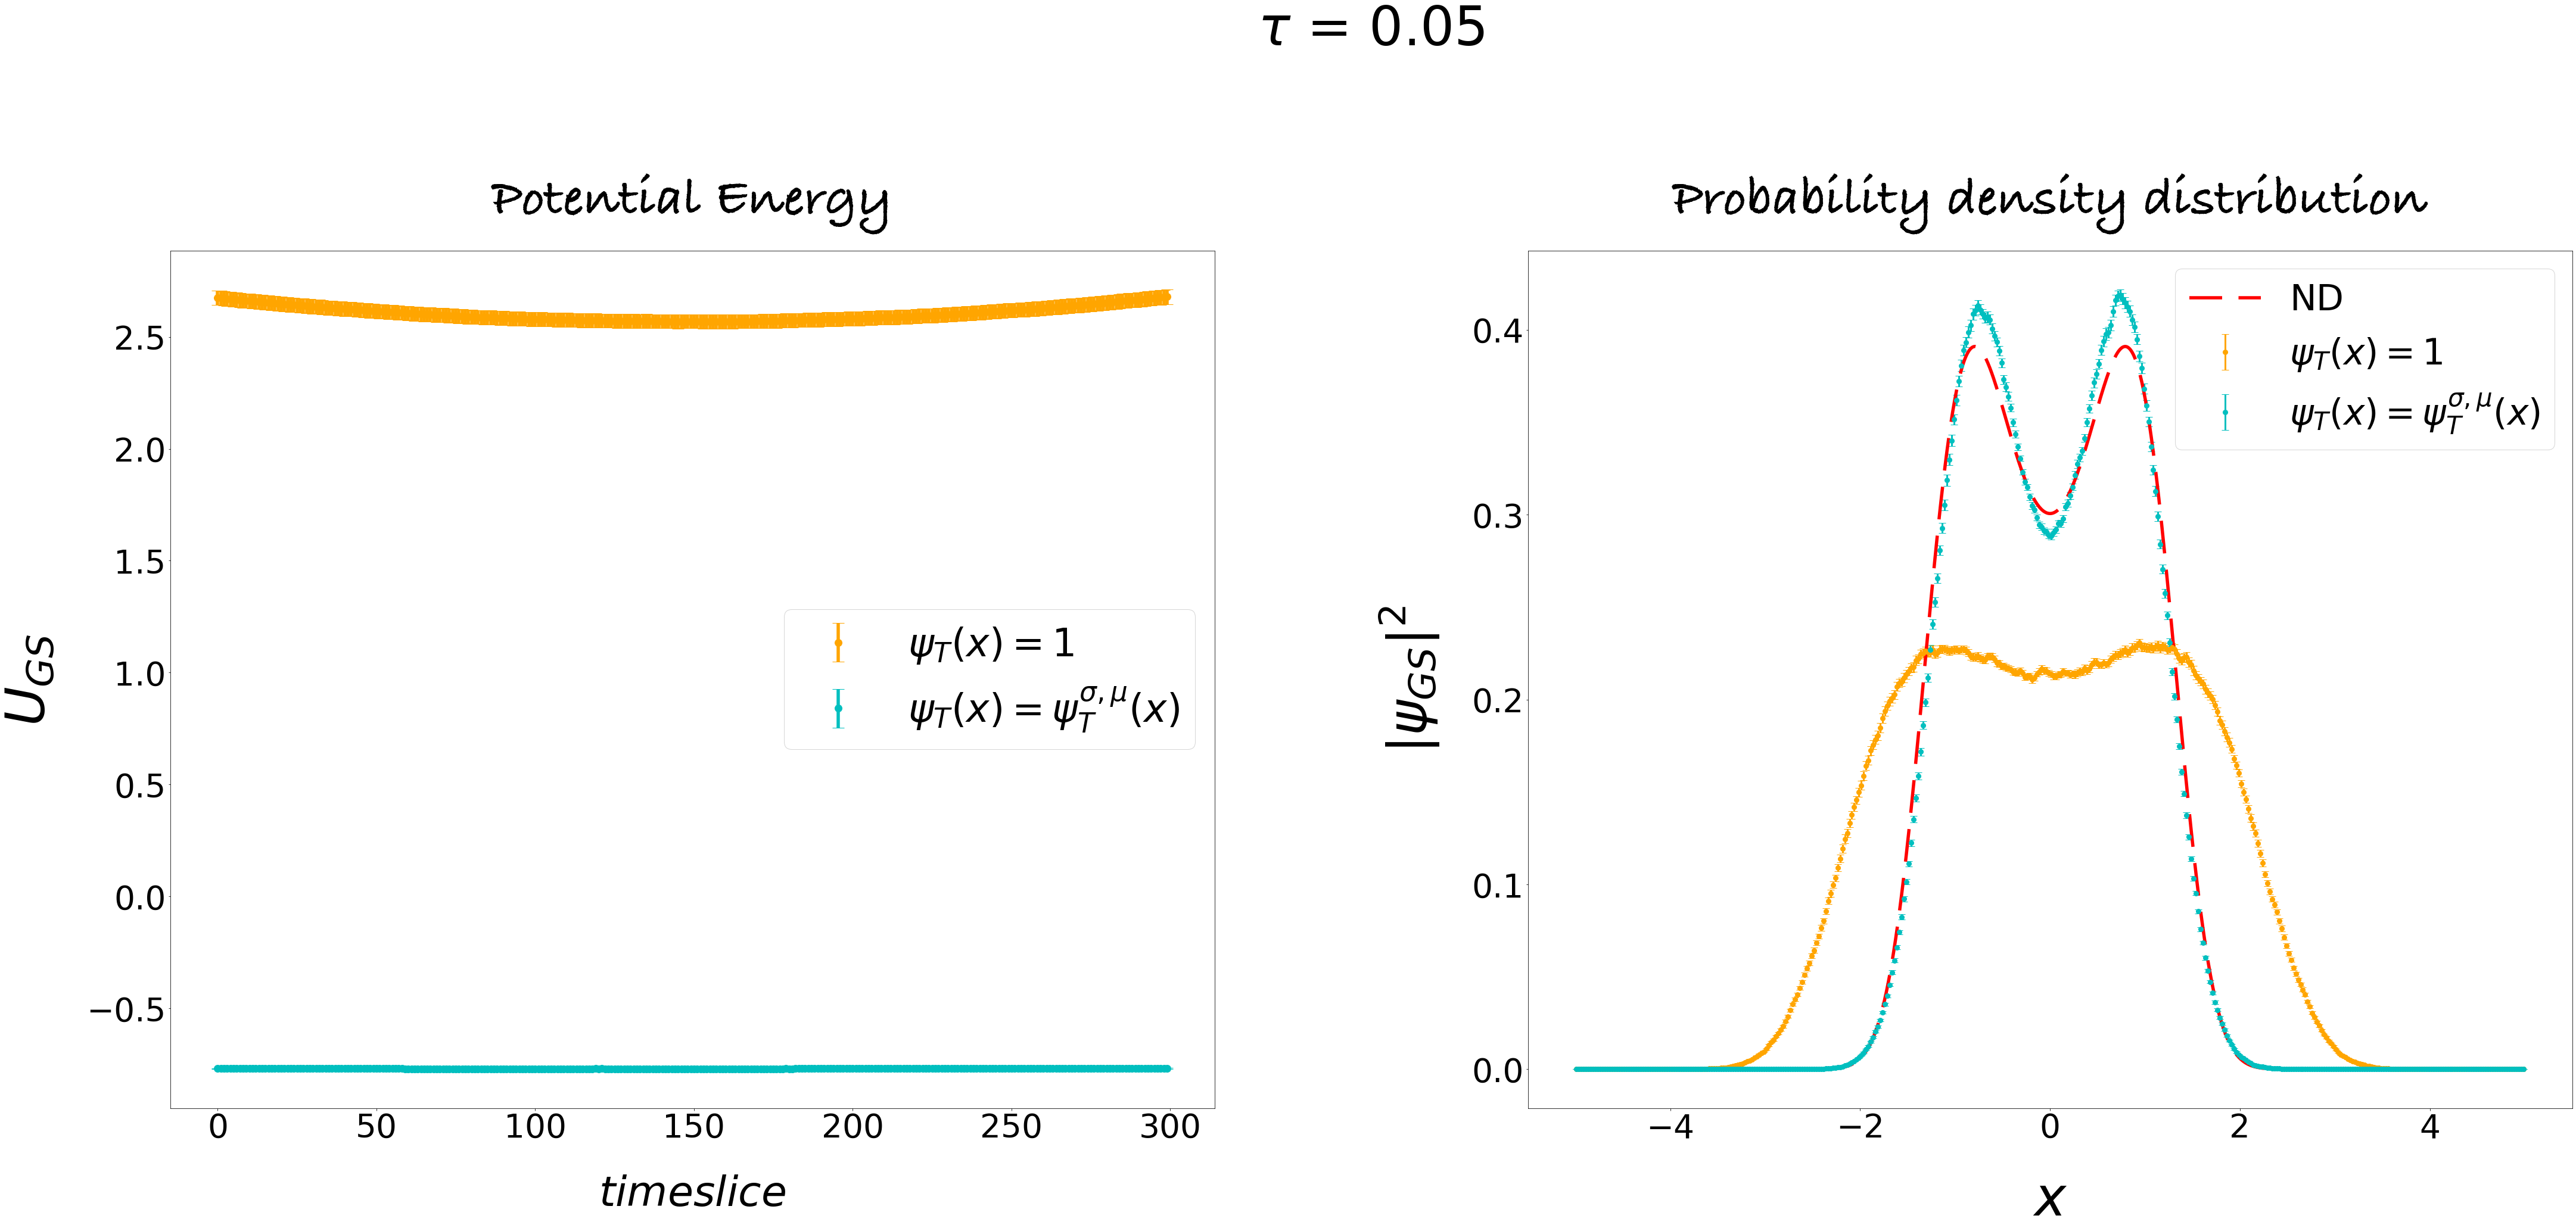

In [20]:
###
#𝜏 = 0.05
###
plt.figure(figsize=[70, 25])  #deafult (6.4,4.8)
plt.suptitle('$\\tau$ = $0.05$', y=1.13, fontsize=90)

plt.subplot(1, 2, 1)
plt.title('Potential Energy', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$timeslice$', fontsize=70, labelpad=50)
plt.ylabel('$U_{GS}$', fontsize=90, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.errorbar(t, potential00_Cte_5, yerr=potential00_Cte_5_err, fmt='o', color='orange',
             elinewidth=5.5, markersize=12, capsize=10, label='$ \\psi_{T}(x) = 1 $')
plt.errorbar(t, potential00_5, yerr=potential00_5_err, fmt='oc', elinewidth=5.5,
             markersize=12, capsize=10, label='$ \\psi_{T}(x) = \psi^{\sigma, \mu}_T(x) $')
plt.legend(fontsize=65, loc='best')

plt.subplot(1, 2, 2)
plt.title('Probability density distribution', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$x$', fontsize=90, labelpad=50)
plt.ylabel('${\\vert {\psi}_{GS} \\vert}^2$', fontsize=90, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.errorbar(x00_Cte_5, pdf00_Cte_5, yerr=pdf00_Cte_5_err, fmt='o', color='orange',
             elinewidth=3.0, markersize=8, capsize=6, label='$ \\psi_{T}(x) = 1 $')
plt.errorbar(x00_5, pdf00_5, yerr=pdf00_5_err, fmt='oc', elinewidth=3.0,
             markersize=8, capsize=6, label='$ \psi_{T}(x) = \\psi^{\sigma, \mu}_T(x) $')
plt.plot(x,(psi[0])**2, color='red', linewidth=5.5, linestyle='--', dashes=(10, 5), label='ND')
plt.legend(fontsize=60, loc='best')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
plt.show()
print('\n')

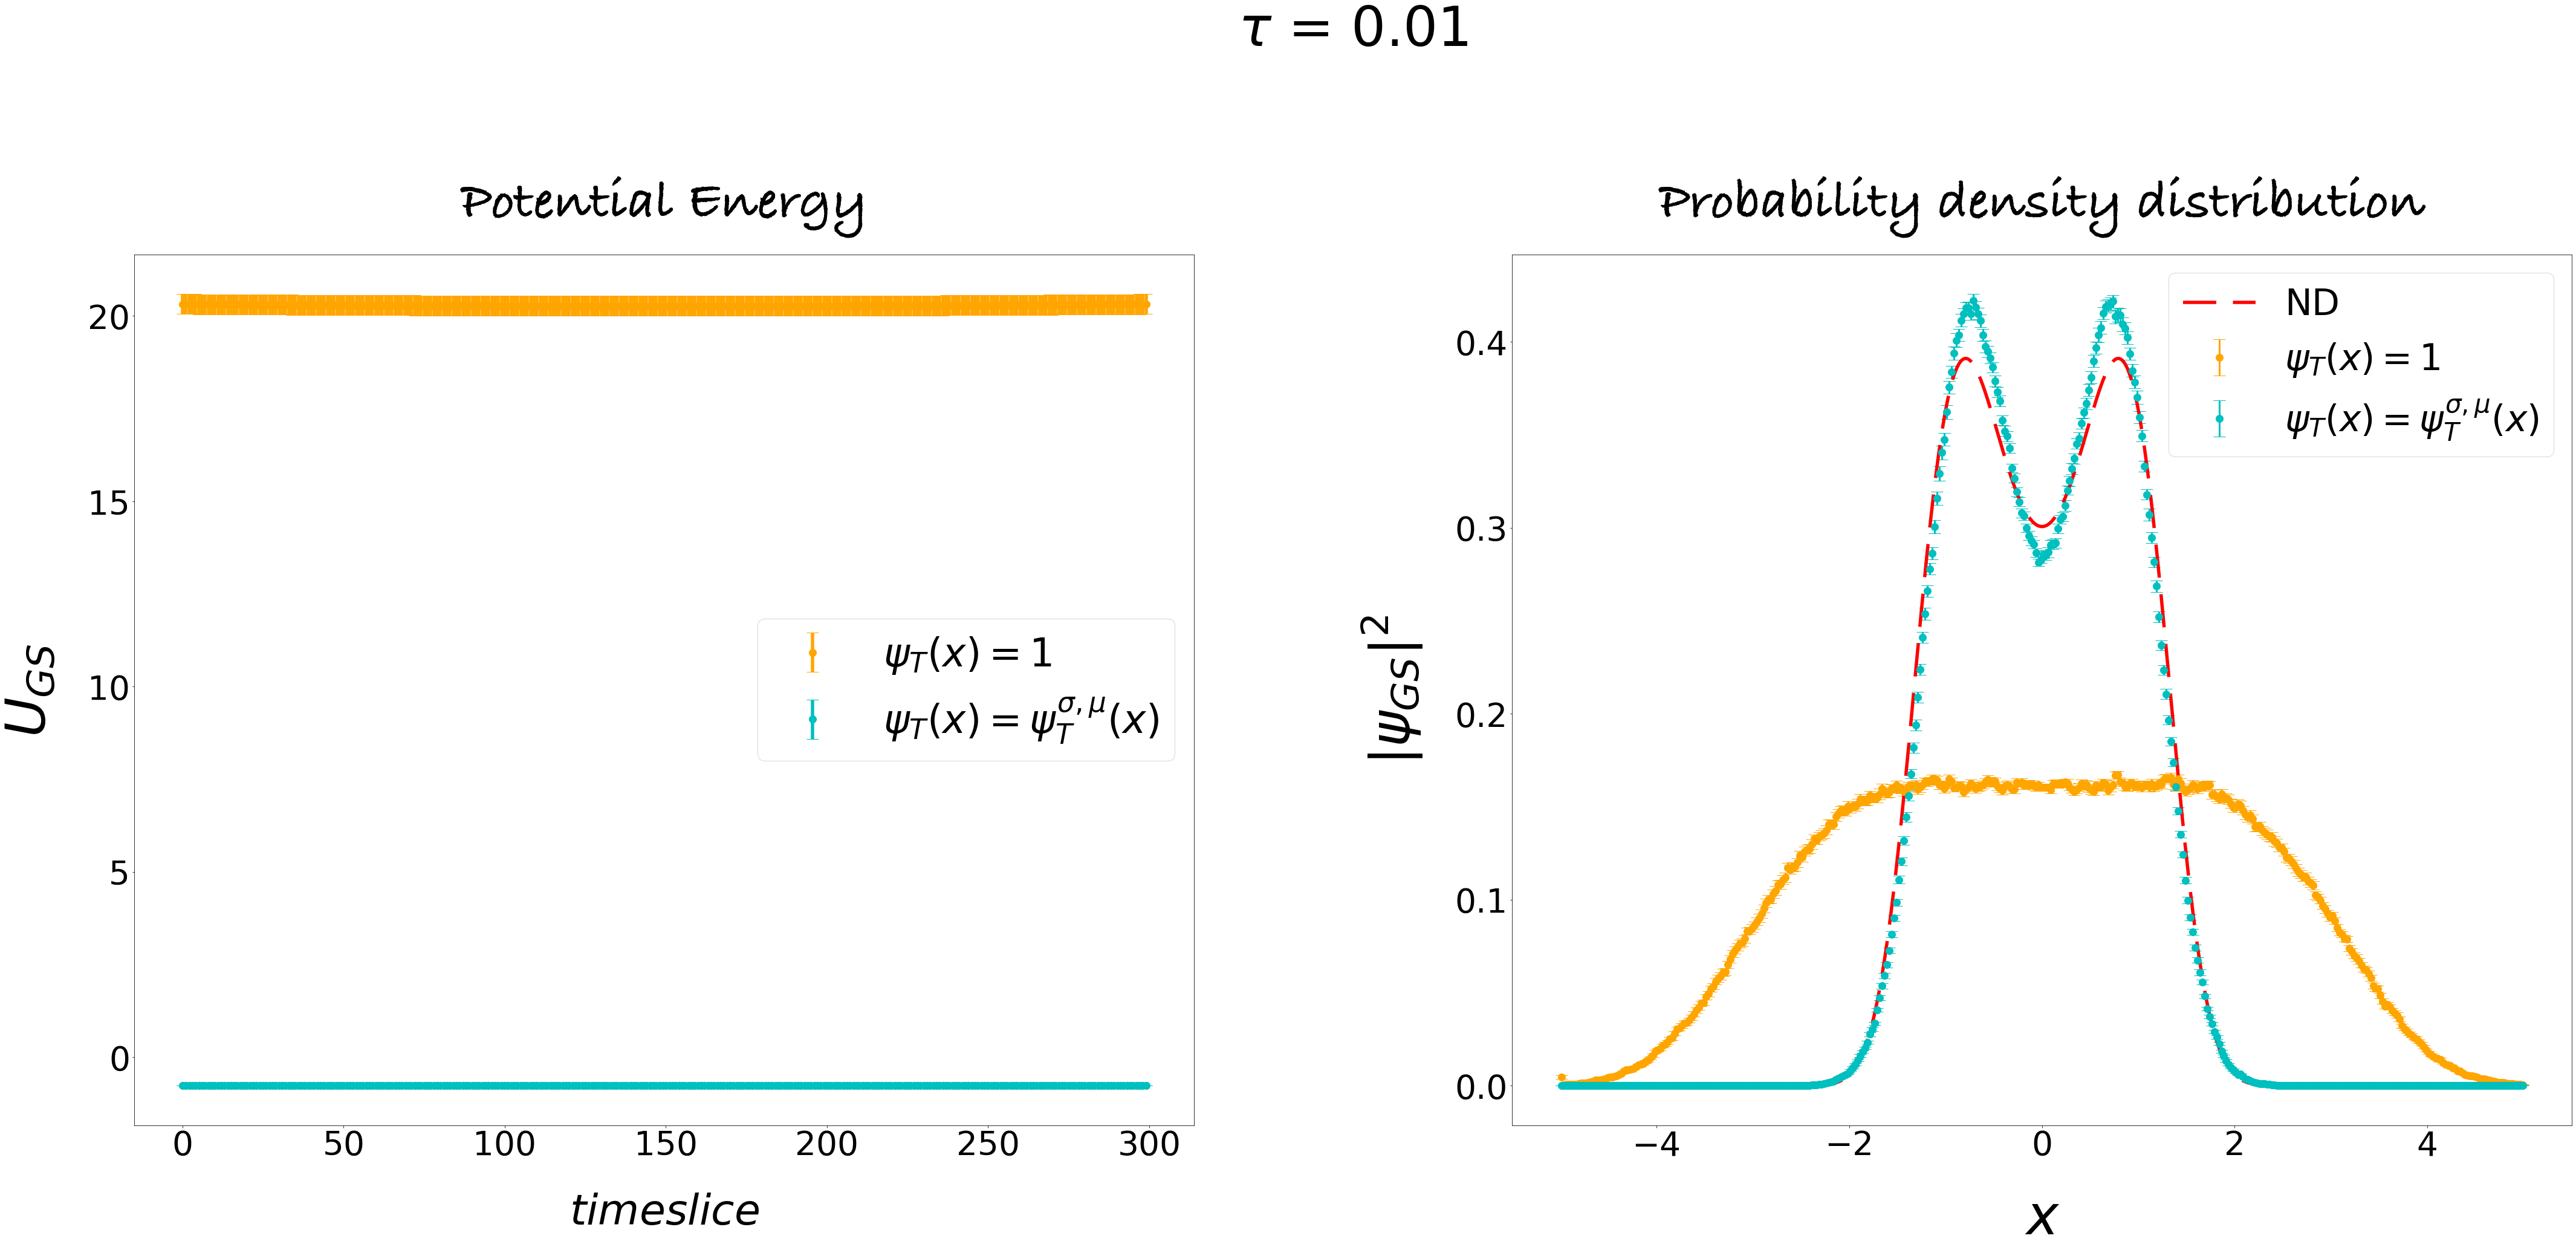

In [21]:
###
#𝜏 = 0.01
###
plt.figure(figsize=[70, 25])  #deafult (6.4,4.8)
plt.suptitle('$\\tau$ = $0.01$', y=1.13, fontsize=90)

plt.subplot(1, 2, 1)
plt.title('Potential Energy', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$timeslice$', fontsize=70, labelpad=50)
plt.ylabel('$U_{GS}$', fontsize=90, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.errorbar(t, potential00_Cte_6, yerr=potential00_Cte_6_err, fmt='o', color='orange',
             elinewidth=5.5, markersize=12, capsize=10, label='$ \\psi_{T}(x) = 1 $')
plt.errorbar(t, potential00_6, yerr=potential00_6_err, fmt='oc', elinewidth=5.5,
             markersize=12, capsize=10, label='$ \\psi_{T}(x) = \psi^{\sigma, \mu}_T(x) $')
plt.legend(fontsize=65, loc='best')

plt.subplot(1, 2, 2)
plt.title('Probability density distribution', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$x$', fontsize=90, labelpad=50)
plt.ylabel('${\\vert {\psi}_{GS} \\vert}^2$', fontsize=90, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.errorbar(x00_Cte_6, pdf00_Cte_6, yerr=pdf00_Cte_6_err, fmt='o', color='orange',
             elinewidth=3.0, markersize=12, capsize=10, label='$ \\psi_{T}(x) = 1 $')
plt.errorbar(x00_6, pdf00_6, yerr=pdf00_6_err, fmt='oc', elinewidth=3.0,
             markersize=12, capsize=10, label='$ \psi_{T}(x) = \\psi^{\sigma, \mu}_T(x) $')
plt.plot(x,(psi[0])**2, color='red', linewidth=5.5, linestyle='--', dashes=(10, 5), label='ND')
plt.legend(fontsize=60, loc='best')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
plt.show()

The plots highlight the importance of making a good variational guess at the beginning: the more overlap there is between the trial and the real ground state wavefunction, the less propagation time is needed to the algorithm and therefore the less timeslice can be use, recalling that the approximation on which the technique is based applies to $ \delta \tau = \dfrac{\tau}{M} \ll 1 $. <br>
It is also significant to note that in the case of the optimized wave function $ \psi_{T}(x) = \psi^{\sigma, \mu}_T(x) $  the algorithm remains very robust even for very small imaginary times, thus being able to catch the structure of the fundamental state. I would say that you can decrease $ \tau $ to about $ 0.3 $ and continue to have a good reconstruction of the square modulus of the ground state wavefunction.

Finally I simulate the system at some finite temperature $ T > 0 $, using the **Path Integral Monte Carlo (PIMC)** code, in order to go beyond the ground state. Even in this case the quantum system is mapped into a classic system of special polymers, which at non-zero temperatures are closed rings. The temperatures I choose to study are $ T = [1, 1.3, 3.5, 6, 10, 20] $, in agreement with the values of the energies of the first excited states calculated through the exact numerical diagonalization.<br>
Below I show the probability densities found with varying temperatures, and the comparison with exact (numerical) ones. I set $ M=30 $, $ \tau=8.0 $, $ M_{MC} = 80000 $ and $ N_{blk} = 20 $, leaving unchanged the other parameters already present in the released input file, and show the probability densities between timeslice $ 1 $ and timeslice $ 29 $.

In [22]:
#load the data
x_1, pdf_1, pdf_1_err=np.loadtxt("08.3/T=1/probability.dat", usecols=(0, 1, 2), unpack=True)
x_2, pdf_2, pdf_2_err=np.loadtxt("08.3/T=1.3/probability.dat", usecols=(0, 1, 2), unpack=True)
x_3, pdf_3, pdf_3_err=np.loadtxt("08.3/T=3.5/probability.dat", usecols=(0, 1, 2), unpack=True)
x_4, pdf_4, pdf_4_err=np.loadtxt("08.3/T=6/probability.dat", usecols=(0, 1, 2), unpack=True)
x_5, pdf_5, pdf_5_err=np.loadtxt("08.3/T=10/probability.dat", usecols=(0, 1, 2), unpack=True)
x_6, pdf_6, pdf_6_err=np.loadtxt("08.3/T=20/probability.dat", usecols=(0, 1, 2), unpack=True)

kinetic1 = np.loadtxt("08.3/T=1/kinetic.dat", usecols=1)
potential1 = np.loadtxt("08.3/T=1/potential.dat", usecols=1)
kinetic2 = np.loadtxt("08.3/T=1.3/kinetic.dat", usecols=1)
potential2 = np.loadtxt("08.3/T=1.3/potential.dat", usecols=1)
kinetic3 = np.loadtxt("08.3/T=3.5/kinetic.dat", usecols=1)
potential3 = np.loadtxt("08.3/T=3.5/potential.dat", usecols=1)
kinetic4 = np.loadtxt("08.3/T=6/kinetic.dat", usecols=1)
potential4 = np.loadtxt("08.3/T=6/potential.dat", usecols=1)
kinetic5 = np.loadtxt("08.3/T=10/kinetic.dat", usecols=1)
potential5 = np.loadtxt("08.3/T=10/potential.dat", usecols=1)
kinetic6 = np.loadtxt("08.3/T=20/kinetic.dat", usecols=1)
potential6 = np.loadtxt("08.3/T=20/potential.dat", usecols=1)

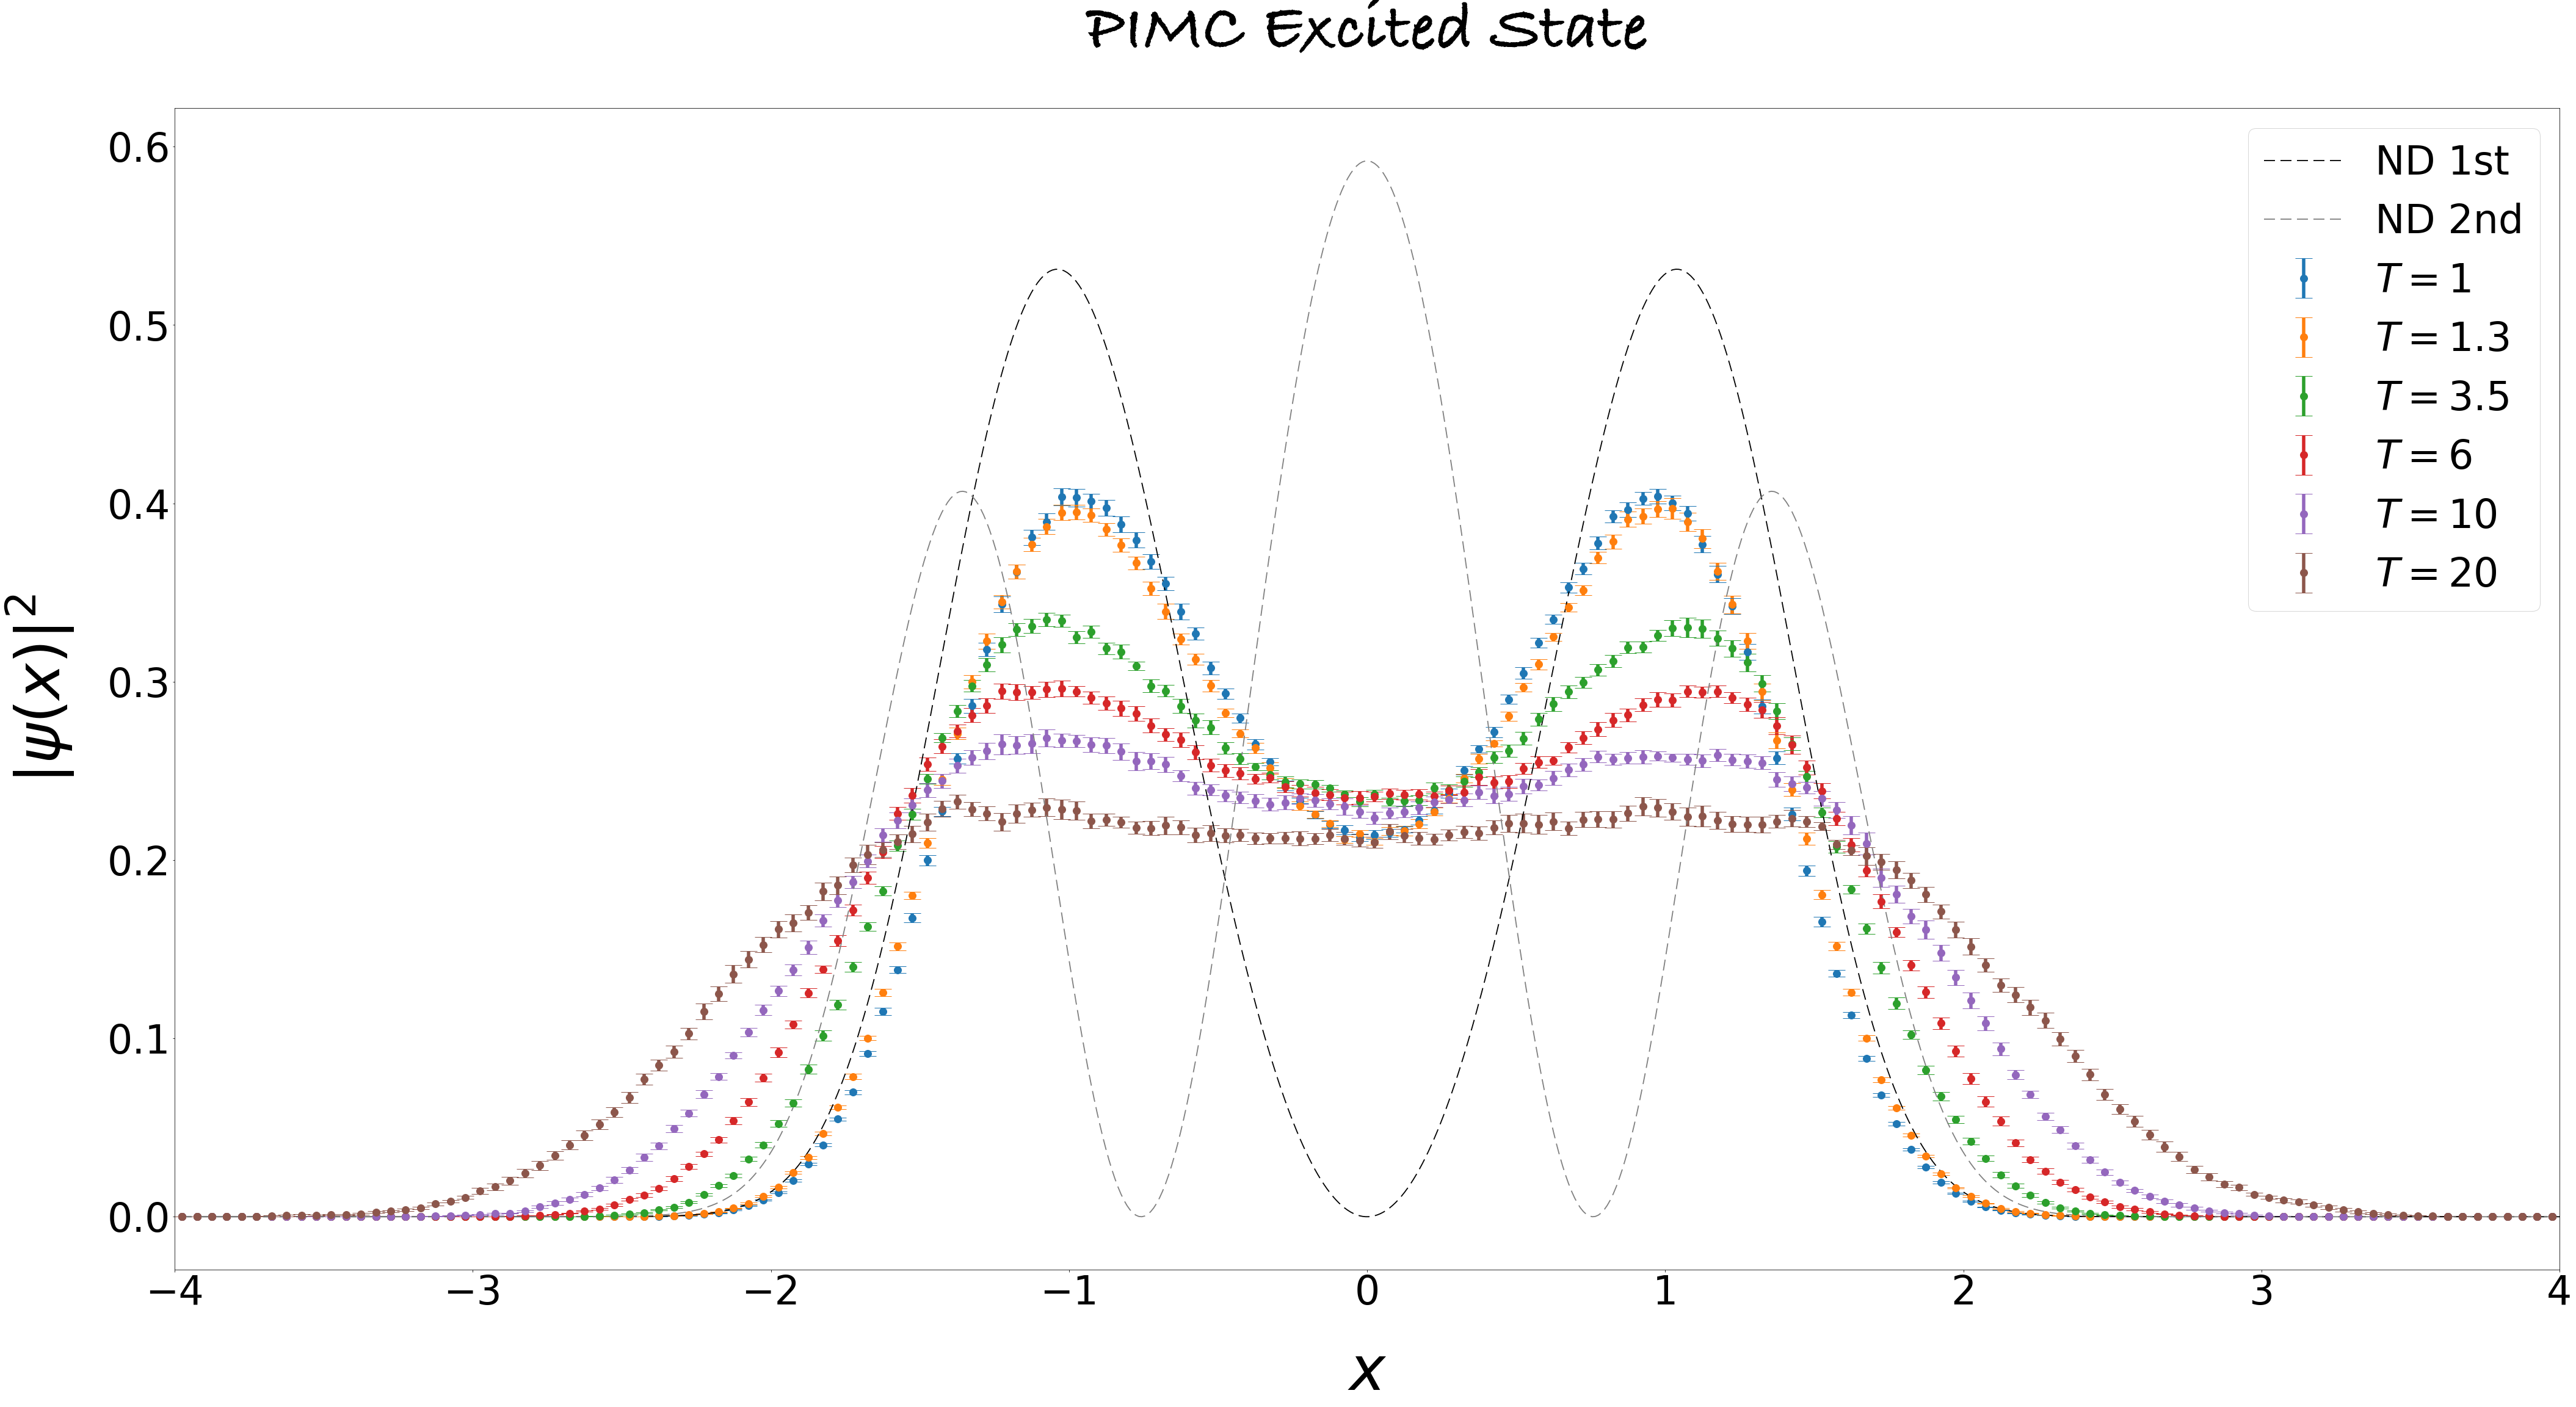

In [23]:
#plots
plt.figure(figsize=[70, 35])  #deafult (6.4,4.8)
plt.title('PIMC Excited State', y=1.05, fontname = 'Bradley Hand', fontsize=110)
plt.xlabel('$ x $', fontsize=100, labelpad=50)
plt.ylabel('$ \\vert \psi(x) \\vert^2 $', fontsize=100, labelpad=50)
plt.xticks(fontsize=65)
plt.yticks(fontsize=65)
plt.xlim(-4, 4)
plt.errorbar(x_1, pdf_1, yerr=pdf_1_err, fmt='o', elinewidth=5.5,
             markersize=12, capsize=14, label='$ T=1 $')
plt.errorbar(x_2, pdf_2, yerr=pdf_2_err, fmt='o', elinewidth=5.5,
             markersize=12, capsize=14, label='$ T=1.3 $')
plt.errorbar(x_3, pdf_3, yerr=pdf_3_err, fmt='o', elinewidth=5.5,
             markersize=12, capsize=14, label='$ T=3.5 $')
plt.errorbar(x_4, pdf_4, yerr=pdf_4_err, fmt='o', elinewidth=5.5,
             markersize=12, capsize=14, label='$ T=6 $')
plt.errorbar(x_5, pdf_5, yerr=pdf_5_err, fmt='o', elinewidth=5.5,
             markersize=12, capsize=14, label='$ T=10 $')
plt.errorbar(x_6, pdf_6, yerr=pdf_6_err, fmt='o', elinewidth=5.5,
             markersize=12, capsize=14, label='$ T=20 $')
plt.plot(x,(psi[1])**2, color='k', linewidth=1.8, linestyle='--', dashes=(10, 5), label='ND 1st')
plt.plot(x,(psi[2])**2, color='grey', linewidth=1.8, linestyle='--', dashes=(10, 5), label='ND 2nd')
plt.legend(fontsize=65, loc='best')
plt.show()

In [24]:
#Energies
print('\n\nPIMC Energy of the Exited States\n')
print('T = 1 \t\t E =', kinetic1[29]+potential1[29])
print('T = 1.3 \t E =', kinetic2[29]+potential2[29])
print('T = 3.5 \t E =', kinetic3[29]+potential3[29])
print('T = 6 \t\t E =', kinetic4[29]+potential4[29])
print('T = 10 \t\t E =', kinetic5[29]+potential5[29])
print('T = 20 \t\t E =', kinetic6[29]+potential6[29])



PIMC Energy of the Exited States

T = 1 		 E = -0.03242299999999998
T = 1.3 	 E = 0.08144200000000001
T = 3.5 	 E = 1.367607
T = 6 		 E = 3.0535922
T = 10 		 E = 5.843692
T = 20 		 E = 12.88491


Obviously, the structures related to the ground state of the system is lost by raising the temperature. Comparing the sampled *pdfs* with those related to the first two excited states obtained through the exact diagonalization (<font color='black'>black</font> and <font color='grey'>grey</font> dashed lines) I can not find a match with the simulated temperatures; nevertheless I should go deeper in the code released and study various combinations of parameters to investigate this aspect better.<br>
I prefer to stop here right now.